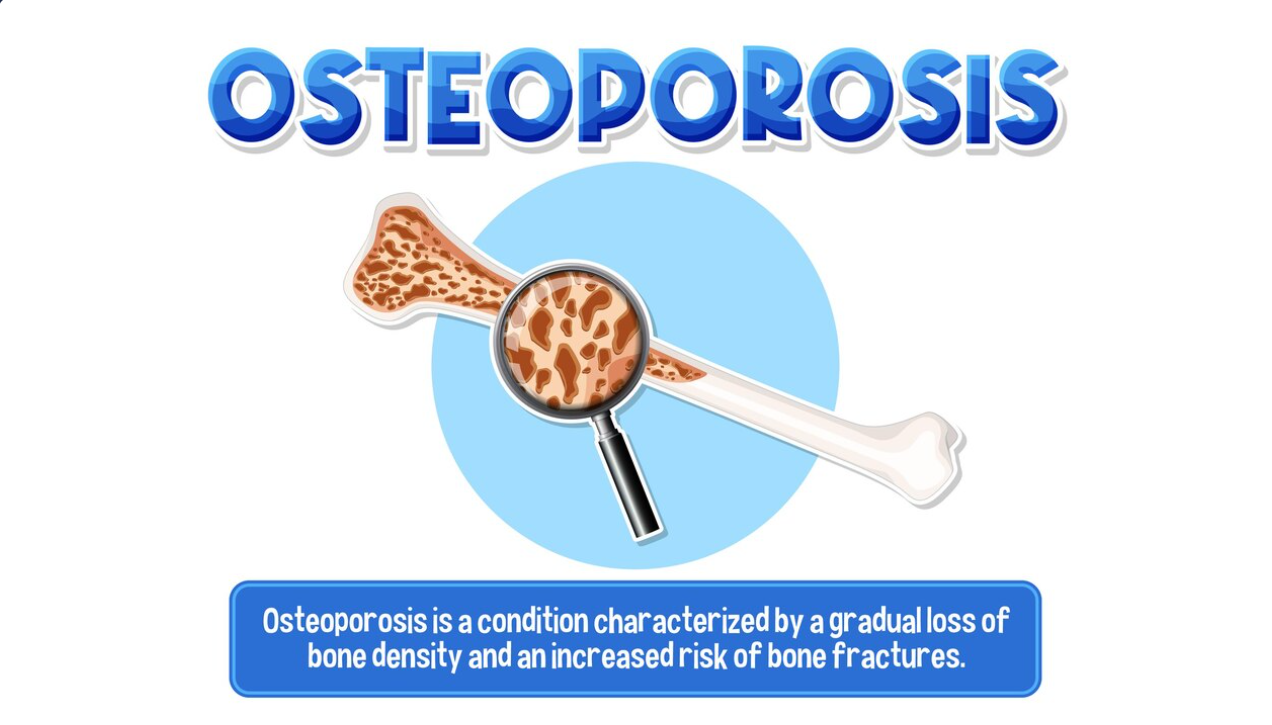

## 1.Title

# Osteoporosis Risk Prediction


#### NAME:ARCHANA KK
#### ORGANIZATION:ENTRI
#### DATE: [01/07/2024]

## 2.Table of Contents


1.Title

2.Table of Contents

3.Overview of Problem Statement

4.Objective

5.Importing necessary libraries

6.Data Collection

7.Data Description

8.EDA (Exploratory Data Analysis)

9.Data Preprocessing

10.Visualization

11.Feature Engineering

12.Data Splitting

13.Model Selection

14.Model Training

15.Model Evaluation

16.Feature Selection

17.Hyperparameter Tuning

18.Result

19.Model Deployment

20.Limitations

21.Conclusion

22.Future Work

## 3. Overview of Problem Statement



Osteoporosis is a medical condition where bones become weak and brittle, increasing the risk of fractures. Early prediction of osteoporosis risk can help in timely intervention and management. This project aims to develop a machine learning model to predict the risk of osteoporosis based on various features.



## 4. Objective



The objective of this project is to develop a machine learning model that accurately predicts the risk of osteoporosis using patient data. The model should have a high accuracy and low error rate to ensure reliable predictions.

## 5.Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

## 6. Data collection 



In [3]:
# Load the dataset
df = pd.read_csv("osteoporosis.csv")

In [4]:
# Display the first few rows of the dataset to understand its structure
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,104866,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,101999,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,None,None,None,Yes,1
2,106567,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,102316,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,None,Rheumatoid Arthritis,Corticosteroids,No,1
4,101944,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,None,Rheumatoid Arthritis,None,Yes,1


In [5]:
# Display the last few rows of the dataset
print("Last few rows of the dataset:")
df.tail()

Last few rows of the dataset:


,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
1953,106130,19,Female,Normal,Yes,African American,Normal,Adequate,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,None,Yes,0
1954,106463,23,Female,Postmenopausal,Yes,Caucasian,Underweight,Low,Insufficient,Active,No,None,None,Corticosteroids,No,0
1955,103142,34,Female,Postmenopausal,No,African American,Underweight,Low,Sufficient,Sedentary,No,None,Hyperthyroidism,None,No,0
1956,105187,25,Male,Postmenopausal,No,African American,Normal,Low,Insufficient,Sedentary,Yes,None,Rheumatoid Arthritis,Corticosteroids,Yes,0
1957,108561,26,Female,Postmenopausal,No,African American,Underweight,Adequate,Sufficient,Sedentary,Yes,None,Rheumatoid Arthritis,Corticosteroids,No,0


>The dataset for this project has 16 columns covering various health and lifestyle factors, along with the osteoporosis status of the individuals.The dataset is Sourced from Kaggle, the dataset includes features like age, gender, hormonal changes, family history, race/ethnicity, body weight, calcium intake, vitamin D intake, physical activity, smoking, alcohol consumption, medical conditions, medication, prior fractures, and osteoporosis status.

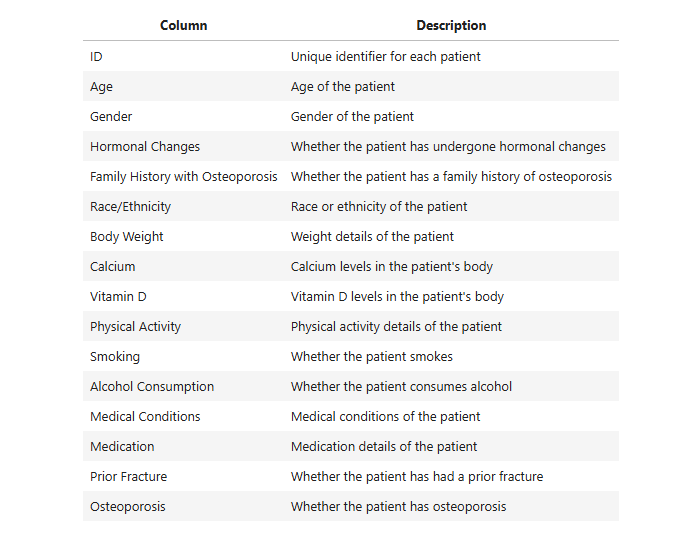

## 7. Data Description

In [6]:
# Display the size of the dataset (number of rows and columns)
print("Dataset size:")
print(df.shape)

Dataset size:
(1958, 16)


>The dataset contains 1958 rows and 16 columns.

## 8.EDA (Exploratory Data Analysis)

In [7]:
# Display the columns of the dataset
columns = df.columns
print("Columns in the dataset:",columns)

Columns in the dataset: Index(['Id', 'Age', 'Gender', 'Hormonal Changes', 'Family History',
       'Race/Ethnicity', 'Body Weight', 'Calcium Intake', 'Vitamin D Intake',
       'Physical Activity', 'Smoking', 'Alcohol Consumption',
       'Medical Conditions', 'Medications', 'Prior Fractures', 'Osteoporosis'],
      dtype='object')


In [8]:
# Numerical columns
numerical_features = df.select_dtypes(include='int').columns
print(numerical_features)

Index(['Id', 'Age', 'Osteoporosis'], dtype='object')


In [9]:
# Categorical columns
categorical_features= df.select_dtypes(include=['object','datetime']).columns
print(categorical_features)

Index(['Gender', 'Hormonal Changes', 'Family History', 'Race/Ethnicity',
       'Body Weight', 'Calcium Intake', 'Vitamin D Intake',
       'Physical Activity', 'Smoking', 'Alcohol Consumption',
       'Medical Conditions', 'Medications', 'Prior Fractures'],
      dtype='object')


In [10]:
# Get a summary of the dataset
print("Summary of the dataset:")
df.info()

Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  1958 non-null   object
 12  Medical Conditions   1958 non-null   object
 13  Medications          1958 non-null   object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-n

In [11]:
# Display statistical summary for all columns within the dataFram
df.describe(include='all')

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
count,1958.000000,1958.000000,1958,1958,1958,1958,1958,1958,1958,1958,1958,1958,1958,1958,1958,1958.000000
unique,NaN,NaN,2,2,2,3,2,2,2,2,2,2,3,2,2,NaN
top,NaN,NaN,Male,Normal,No,African American,Normal,Low,Sufficient,Active,Yes,None,Hyperthyroidism,None,Yes,NaN
freq,NaN,NaN,992,981,998,681,1027,1004,1011,1021,982,988,678,985,983,NaN
mean,105515.320735,39.101124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000
std,2589.407806,21.355424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500128
min,101008.000000,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,103348.500000,21.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,105469.000000,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000
75%,107755.000000,53.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [12]:
# Describe the numerical features
print("Statistical description of numerical features:")
df.describe()

Statistical description of numerical features:


,Id,Age,Osteoporosis
count,1958.000000,1958.000000,1958.000000
mean,105515.320735,39.101124,0.500000
std,2589.407806,21.355424,0.500128
min,101008.000000,18.000000,0.000000
25%,103348.500000,21.000000,0.000000
50%,105469.000000,32.000000,0.500000
75%,107755.000000,53.000000,1.000000
max,109996.000000,90.000000,1.000000


In [13]:
# Describe the categorical features
print("Statistical description of categorical features:")
df[categorical_features].describe()

Statistical description of categorical features:


,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures
count,1958,1958,1958,1958,1958,1958,1958,1958,1958,1958,1958,1958,1958
unique,2,2,2,3,2,2,2,2,2,2,3,2,2
top,Male,Normal,No,African American,Normal,Low,Sufficient,Active,Yes,None,Hyperthyroidism,None,Yes
freq,992,981,998,681,1027,1004,1011,1021,982,988,678,985,983


In [14]:
# Check for Null Values 
print("Checking for missing values:")
print(df.isnull().sum())

Checking for missing values:
Id                     0
Age                    0
Gender                 0
Hormonal Changes       0
Family History         0
Race/Ethnicity         0
Body Weight            0
Calcium Intake         0
Vitamin D Intake       0
Physical Activity      0
Smoking                0
Alcohol Consumption    0
Medical Conditions     0
Medications            0
Prior Fractures        0
Osteoporosis           0
dtype: int64


In [15]:
# Check for Null Duplicates
print("Checking for duplicate records:")
print(df.duplicated().sum())

Checking for duplicate records:
0


>There are no missing values or duplicates in the dataset.We can shift our focus to other critical aspects of data preprocessing and analysis, including handling unnecessary columns, detecting and treating outliers, and addressing skewness and kurtosis.








### Data Visualization

<Figure size 2000x1000 with 0 Axes>

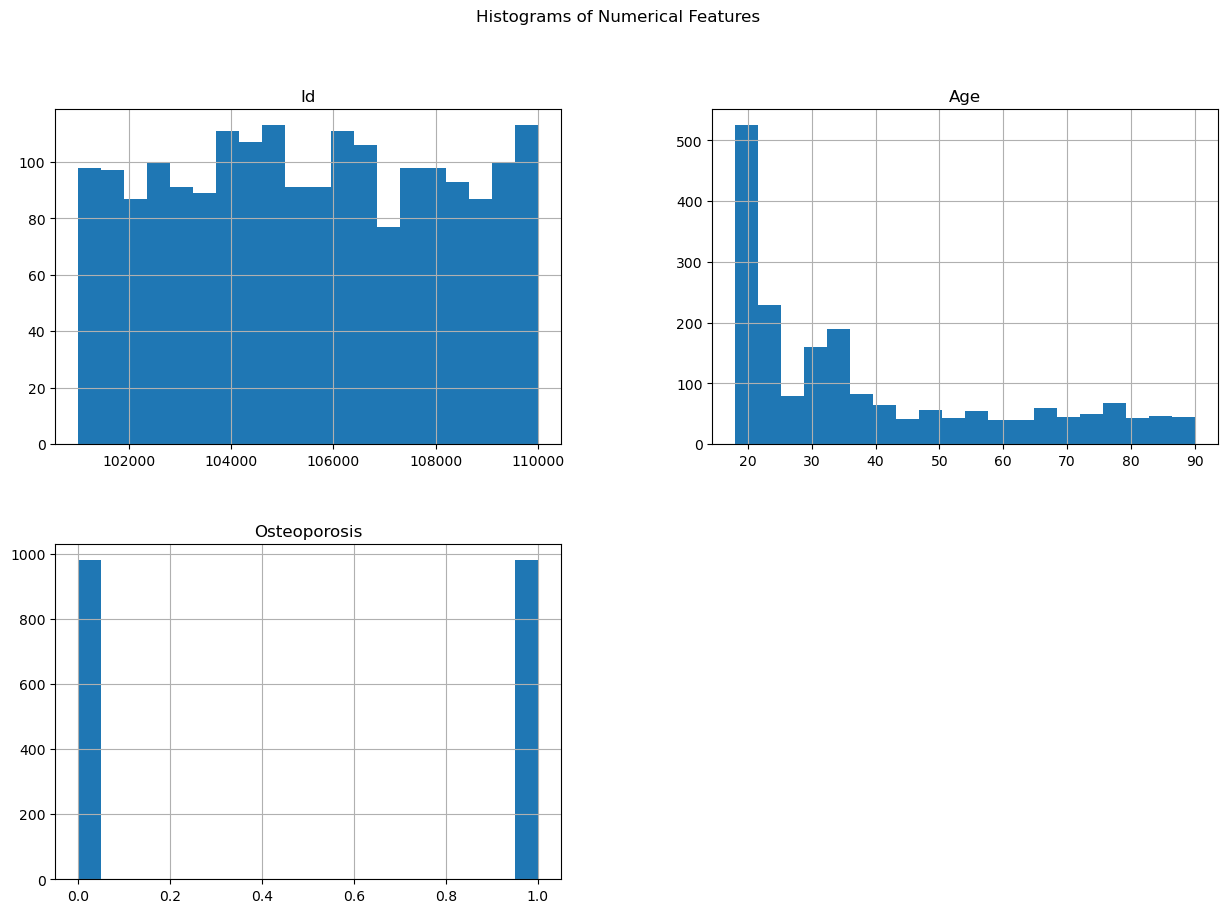

In [16]:
# Histograms for numerical features
plt.figure(figsize=(20, 10))
df[numerical_features].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

>Histograms are essential visual tools in data analysis for understanding how numerical data is distributed across different intervals or bins. They provide insights into the central tendency and spread of each feature, helping to identify patterns such as skewness

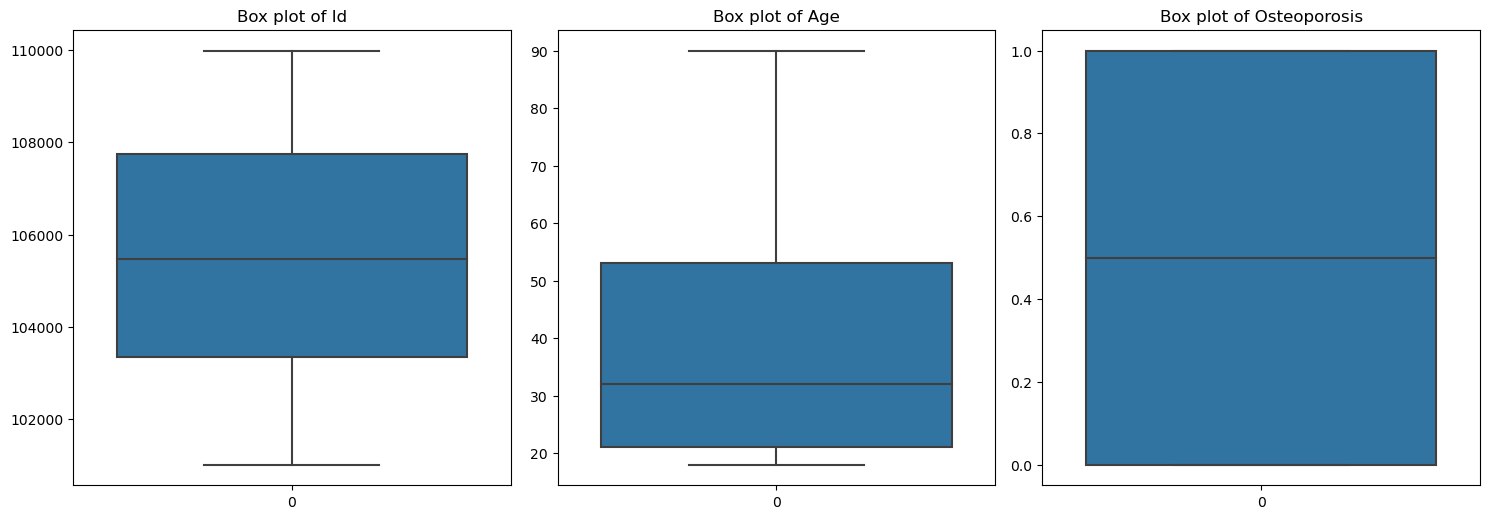

In [17]:
# Box plots for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

>Box plots are valuable visualizations in data analysis for understanding the distribution and variability of numerical data across different features. Each box plot provides a clear depiction of the median, interquartile range (IQR), and potential outliers within a feature.

>There is no  outliers in this dataset.

>Since there are no missing values, duplicates, or outliers, those preprocessing steps are not required for this dataset.  we'll focus on removing unnecessary columns and addressing skewness and kurtosis.

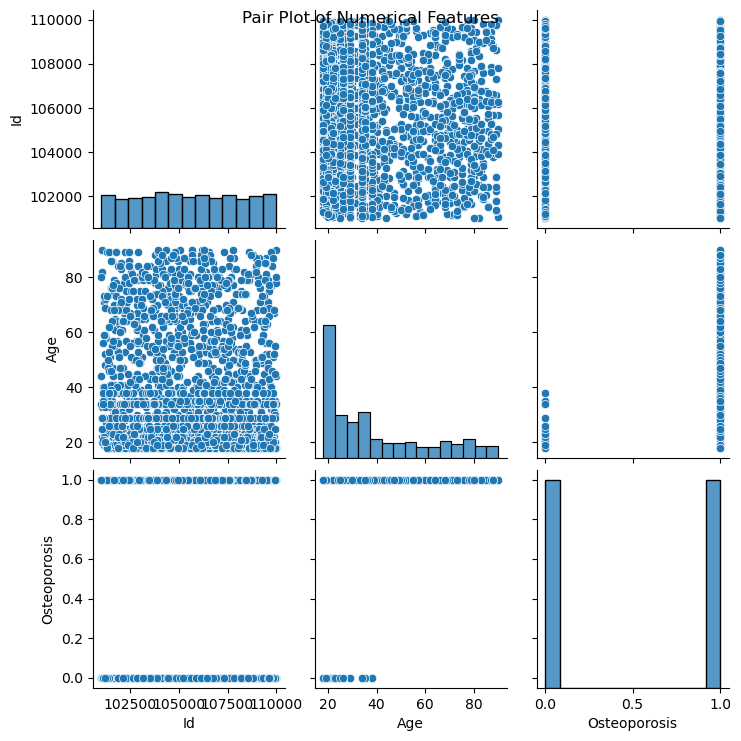

In [18]:
# Scatter plot matrix
sns.pairplot(df[numerical_features])
plt.suptitle('Pair Plot of Numerical Features')
plt.show()


>Pair plots are used to visualize pairwise relationships between numerical variables in a dataset. They help identify patterns, trends, and potential correlations between variables,, providing valuable insights for further exploration and analysis.


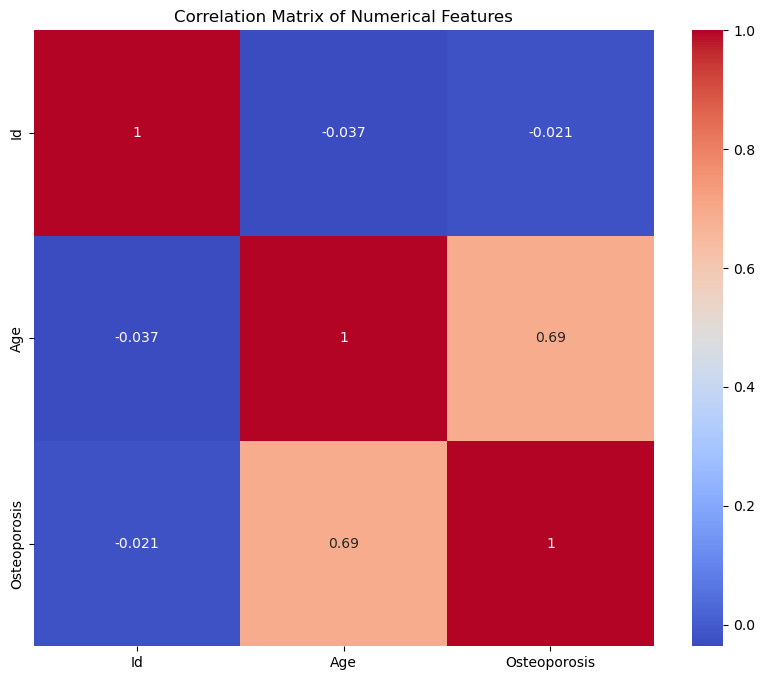

In [19]:
# Correlation matrix
corr_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

>The correlation matrix visually represents the relationships between numerical features in a dataset. Each cell in the matrix shows the correlation coefficient between two variables, with values ranging from -1 to 1. A high positive correlation (close to 1) indicates that the variables move together in the same direction, while a high negative correlation (close to -1) indicates they move in opposite directions. A value near 0 suggests no linear relationship.

>The correlation of 0.69 between Age and Osteoporosis suggests a  positive correlation. This means that as age increases, the likelihood or severity of osteoporosis also tends to increase.

####  Target Variable Distribution

Text(0.5, 1.0, 'Osteoporosis')

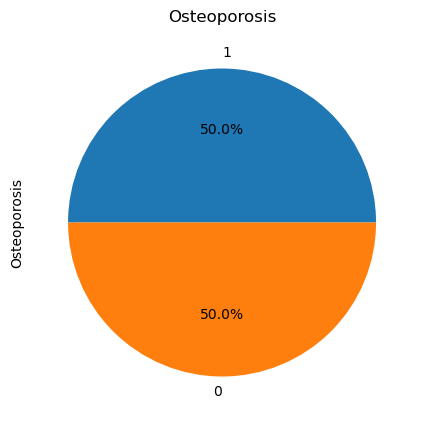

In [20]:
#pie chart for the target variable (Osteoporosis)
plt.figure(figsize=(5,5))
df['Osteoporosis'].value_counts().plot.pie(autopct='%1.1f%%').set_title('Osteoporosis')



>The pie chart illustrates the distribution of patients with and without osteoporosis. It displays equal halves, with 50% for each class, confirming a perfectly balanced dataset where the number of patients in each class is equal

#### Age and Osteoporosis

Text(0.5, 1.0, 'Osteoporosis by Age')

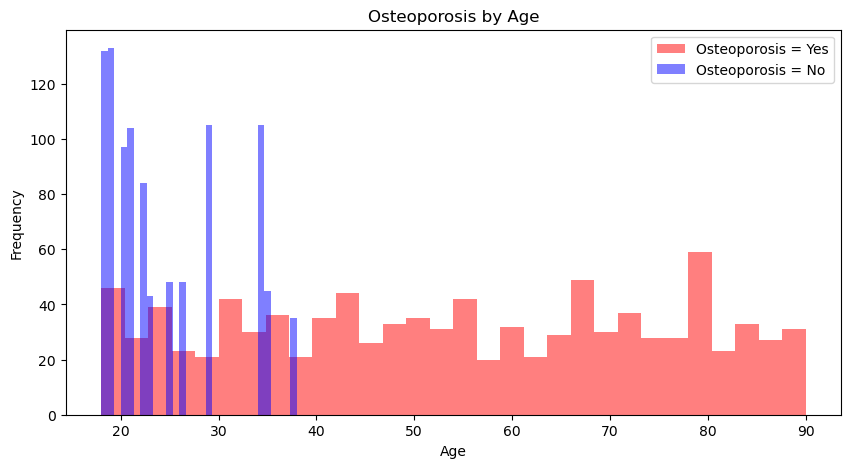

In [21]:
#two layer histogram for the Age and Osteoporosis
plt.figure(figsize=(10,5))
df[df['Osteoporosis']==1]['Age'].plot.hist(bins=30, alpha=0.5, color='red', label='Osteoporosis = Yes')
df[df['Osteoporosis']==0]['Age'].plot.hist(bins=30, alpha=0.5, color='blue', label='Osteoporosis = No')

#legends and title
plt.legend()
plt.xlabel('Age')
plt.title('Osteoporosis by Age')

>This graph shows relation between the risk of osteoporosis and the age of the patient. In the graph we can see that that there is significant risk of osteoporosis in patients of all ages but patients between the ages 20 to 40 have significantly much lower risk of osteoporosis. This highlights that fact that younger patients are less likely to have osteoporosis.

#### Gender and Osteoporosis

Text(0.5, 1.0, 'Gender vs Osteoporosis')

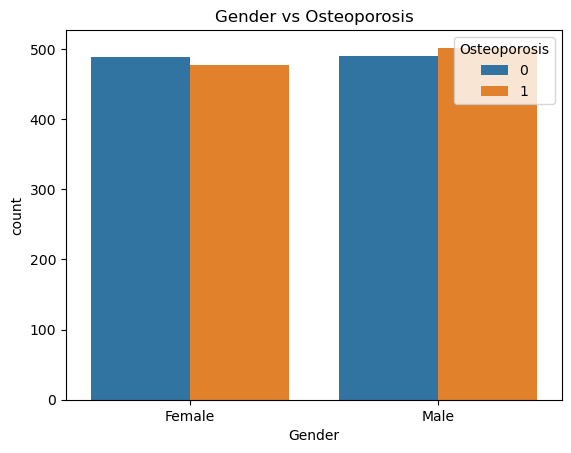

In [22]:
sns.countplot(x='Gender', data=df, hue='Osteoporosis').set_title('Gender vs Osteoporosis')

>In Gender graph, we can visualize the relationship between gender and the risk of osteoporosis. The graph shows that there is no concrete relationship between gender and the risk of osteoporosis, however, according to the numbers in the dataset, the males tend to have slightly higher number of osteoporosis cases than females, but the difference is not significant. Therefore, gender could be a weak predictor for osteoporosis.


#### Hormonal Changes and Osteoporosis

Text(0.5, 1.0, 'Hormonal changes and Osteoporosis')

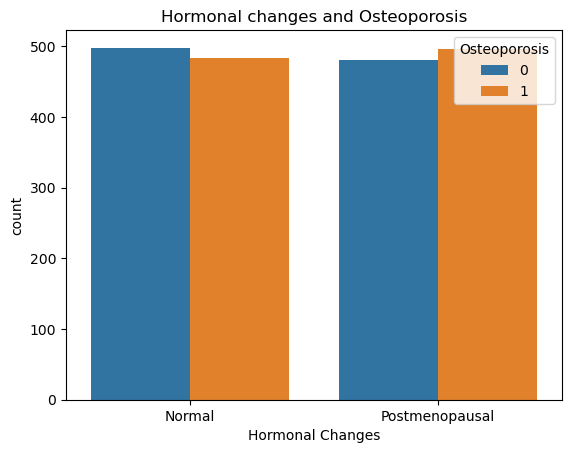

In [23]:
#hormonal changes and Osteoporosis
sns.countplot(x='Hormonal Changes',data=df,hue='Osteoporosis').set_title('Hormonal changes and Osteoporosis')

>The graph shows that patients who have undergone hormonal changes have a risk of osteoporosis than those who have not undergone hormonal changes. This indicates that hormonal changes can be a significant risk factor for osteoporosis. This highlights that our hormones contribute in making our bones strong



####  Family History and Osteoporosis

Text(0.5, 1.0, 'Family History and Osteoporosis')

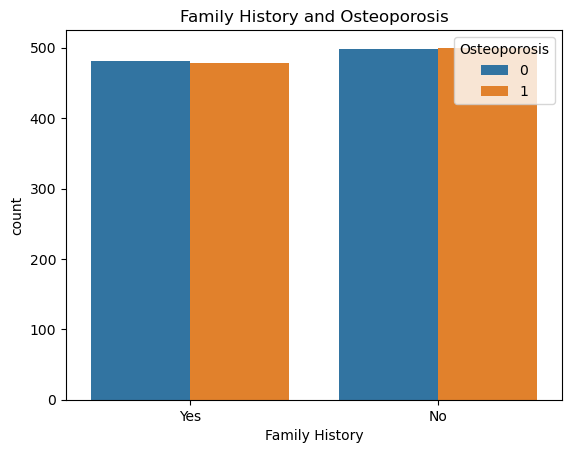

In [24]:
sns.countplot(x = "Family History", data = df, hue = "Osteoporosis").set_title("Family History and Osteoporosis")

>The graph shows the relationship between family history of osteoporosis and the risk of osteoporosis. But in the graph there is not much differnece in both cases regarding the risk of osteoporosis. Therefore, family history couldn't be considered a predictor for osteoporosis.


#### Race/Ethnicity and Osteoporosis

Text(0.5, 1.0, 'Race/Ethnicity and Osteoporosis')

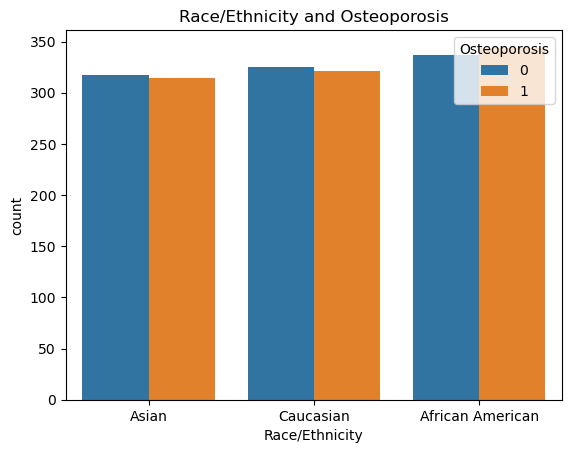

In [25]:
sns.countplot(x="Race/Ethnicity", data = df, hue = "Osteoporosis").set_title("Race/Ethnicity and Osteoporosis")

>This graph shows the relationship between Race/Ethnicity and the risk of osteoporosis. The graph indicates that the risk of osteoporosis is similar across different races, with no definitive relationship between race and the risk of osteoporosis.



#### Body Weight and Osteoporosis

Text(0.5, 1.0, 'Body Weight and Osteoporosis')

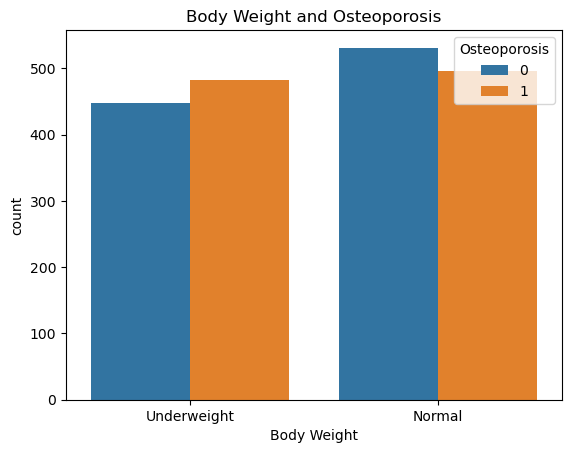

In [26]:
sns.countplot(x="Body Weight", data = df, hue = "Osteoporosis").set_title("Body Weight and Osteoporosis")

>Body weight is an important factor in determining the risk of osteoporosis. The graph shows that patients with lower body weight have a higher risk of osteoporosis than those with higher body weight. This indicates that body weight can be a significant risk factor for osteoporosis. This highlights that our body weight contributes in making our bones strong.

#### Nutrition and Osteoporosis

Text(0.5, 1.0, 'Vitamin D Intake and Osteoporosis')

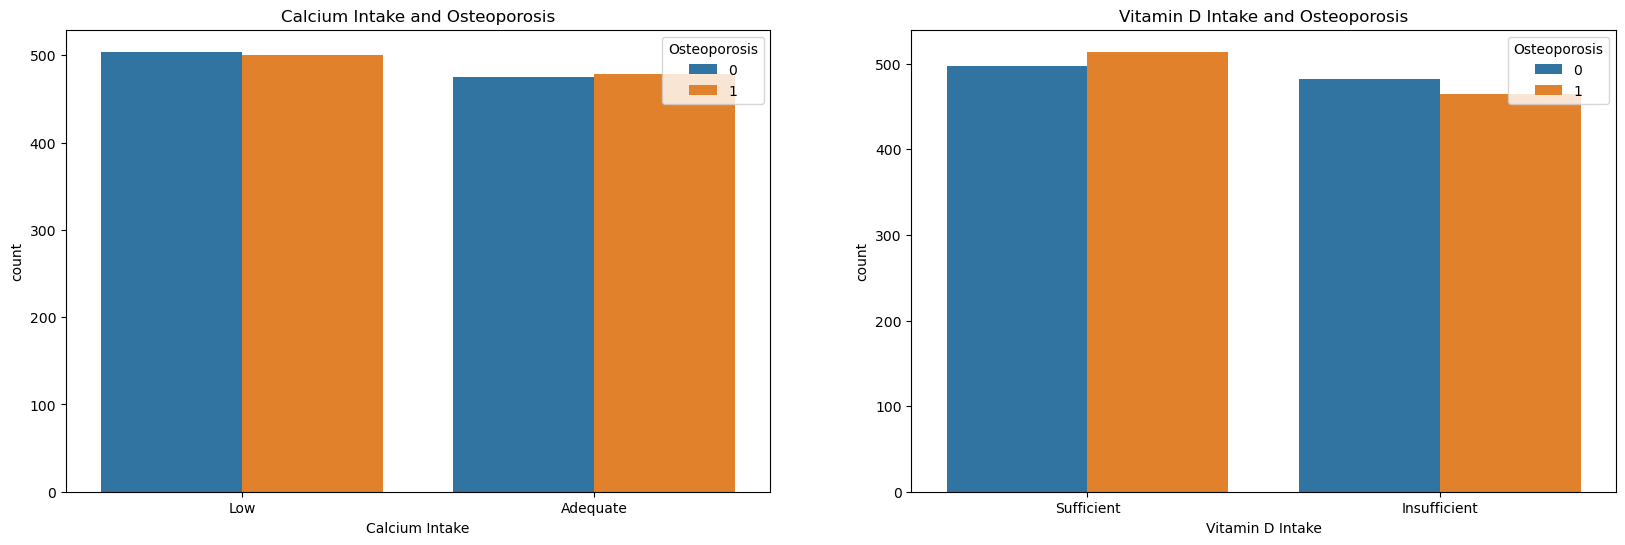

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
sns.countplot(x='Calcium Intake', data=df, ax=ax[0], hue='Osteoporosis').set_title('Calcium Intake and Osteoporosis')
sns.countplot(x='Vitamin D Intake', data=df, ax=ax[1], hue='Osteoporosis').set_title('Vitamin D Intake and Osteoporosis')

>Nutrition and Osteoporosis are closely related. The graph shows that patients with lower calcium and vitamin D levels have  risk of osteoporosis than those with higher calcium and vitamin D levels. This highlights that our nutrition contributes in making our bones strong.

#### Physical Activity and Osteoporosis

Text(0.5, 1.0, 'Physical Activity and Osteoporosis')

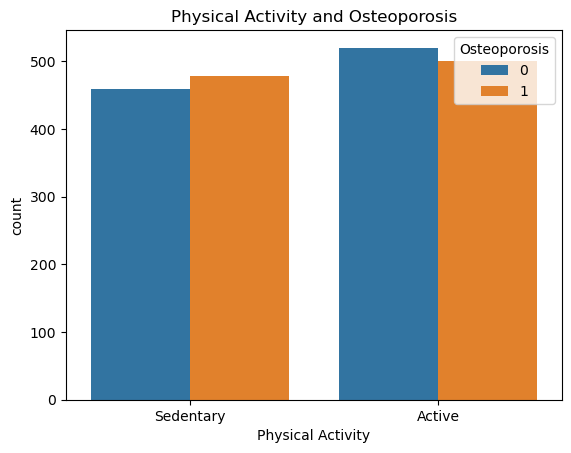

In [28]:
sns.countplot(x='Physical Activity', data=df, hue='Osteoporosis').set_title('Physical Activity and Osteoporosis')

>Physical Activity and Osteoporosis have a relation between them. The graph shows that patients with active physical acitve lifestyle lower risk of osteoporosis as compared to the patients with sedentary lifestyle.

#### Smoking and Alcohol Consumption and Osteoporosis

Text(0.5, 1.0, 'Alcohol Consumption and Osteoporosis')

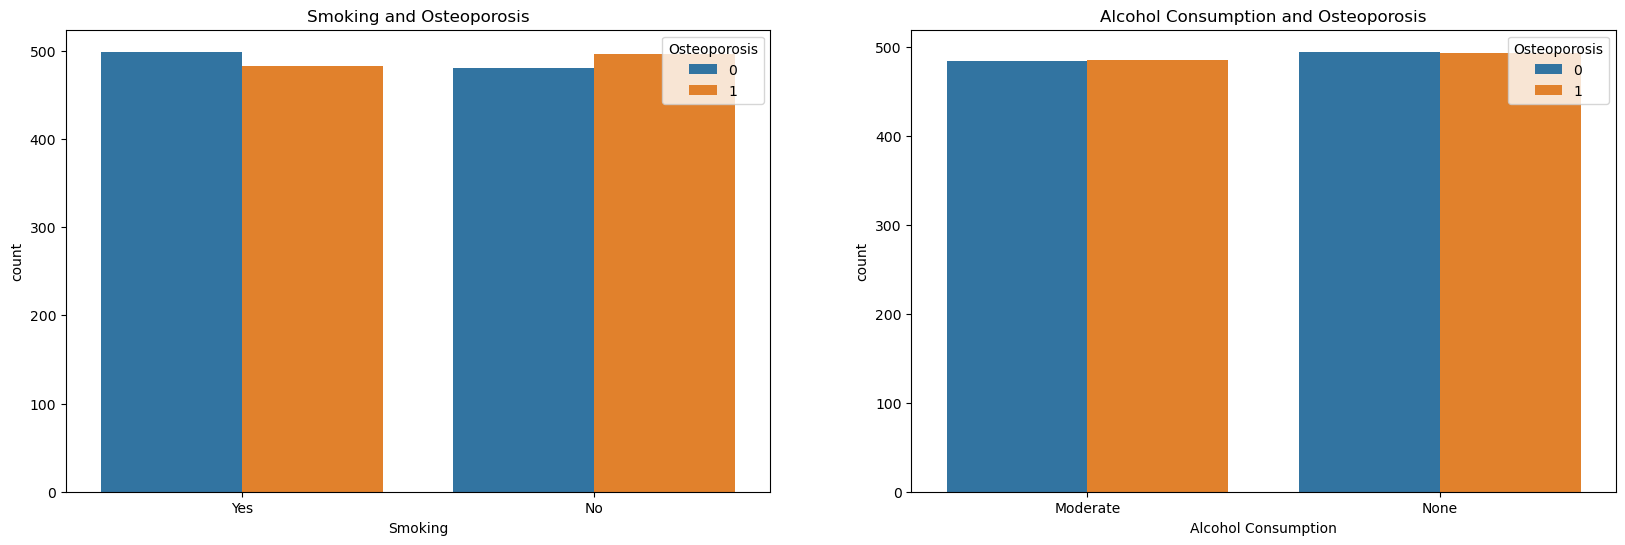

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
sns.countplot(x='Smoking', data=df, ax=ax[0], hue='Osteoporosis').set_title('Smoking and Osteoporosis')
sns.countplot(x='Alcohol Consumption', data=df, ax=ax[1], hue='Osteoporosis').set_title('Alcohol Consumption and Osteoporosis')

>Smoking and Alcohol Consumption are one of those factors that could have adverse effect on a patients health. Here, the graph shows that patients who smoke and consume alcohol does not relate to the risk of osteoporosis. This indicates that smoking and alcohol consumption are not significant risk factors for osteoporosis.

#### Medical Conditions and Medications and Osteoporosis

Text(0.5, 1.0, 'Medications and Osteoporosis')

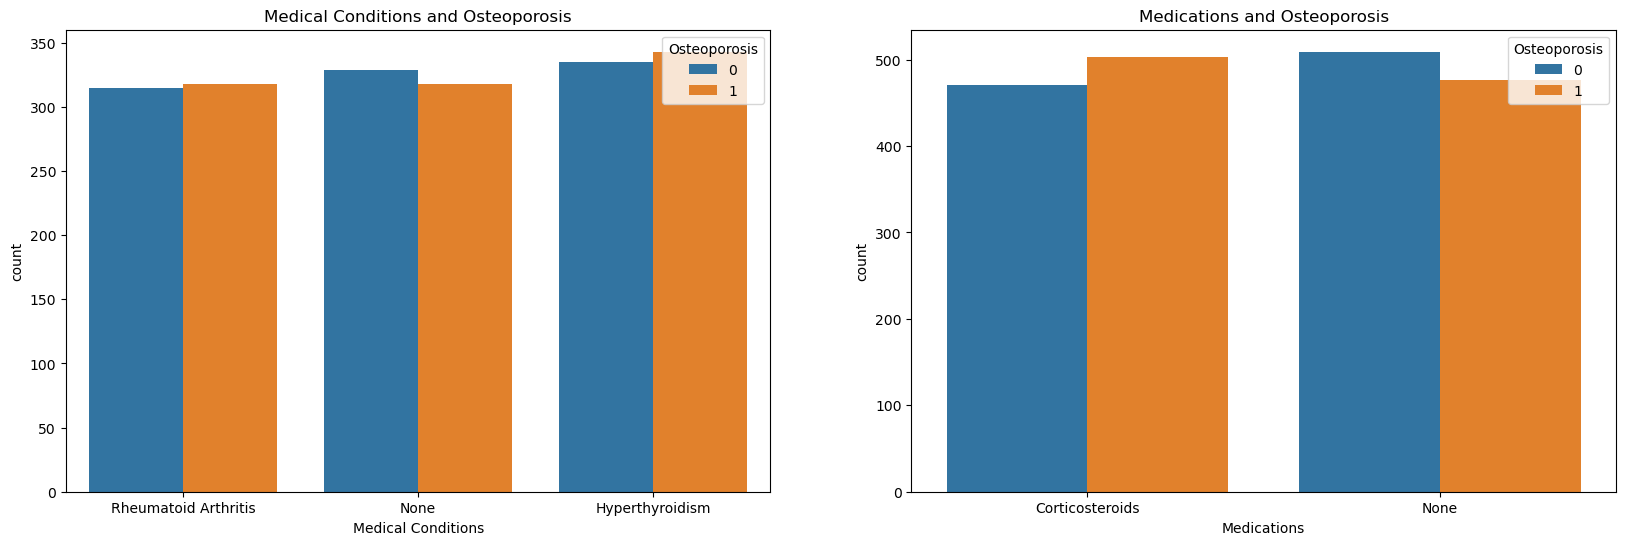

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
sns.countplot(x='Medical Conditions', data=df, ax=ax[0], hue='Osteoporosis').set_title('Medical Conditions and Osteoporosis')
sns.countplot(x='Medications', data=df, ax=ax[1], hue='Osteoporosis').set_title('Medications and Osteoporosis')

>The graph shows that patients with medical conditions like Hyperthyroidism have a higher risk of osteoporosis than those without medical conditions. This indicates that medical conditions can be a significant risk factor for osteoporosis. In addition to that patients who consume medications like Corticosteriods have higher risk of osteoporosis.

#### Prior Fracture and Osteoporosis

Text(0.5, 1.0, 'Prior Fractures and Osteoporosis')

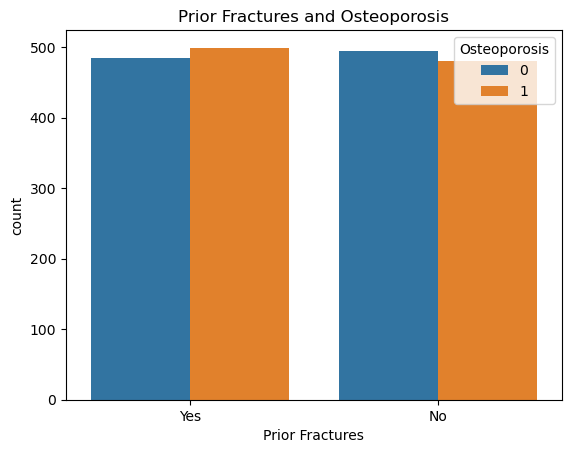

In [31]:
sns.countplot(x='Prior Fractures', data=df, hue='Osteoporosis').set_title('Prior Fractures and Osteoporosis')



>This graph illustrates the relationship between prior fractures and the risk of osteoporosis. It clearly indicates that a history of fractures is associated with an increased risk of developing osteoporosis.

## 9. Data Preprocessing

##### Handling Missing Values:


>>The dataset has been checked for missing values, and it has been confirmed that there are no missing values in the dataset, there is no need for data imputation or any further preprocessing to handle missing data.

##### Dealing with Duplicate Data

>After checking for duplicate records in the dataset, it has been confirmed that there are no duplicate entries:

##### Remove unnecessary columns

In [32]:
# Assuming 'ID' is an unnecessary unique identifier
df.drop(columns=['Id'], inplace=True)
numerical_features=['Age', 'Osteoporosis']


>The 'Id' column is removed as it is assumed to be a unique identifier and not useful for model training.

##### Outlier Detection and Treatment:

>The dataset has been checked for missing values, and it has been confirmed that there are no missing values in the dataset, there is no need for data imputation or any further preprocessing to handle missing data.

##### Skewness & Kurtosis


In [33]:
from scipy.stats import skew, kurtosis

#claculate skewness and kurtosis
skewness = df[numerical_features ].apply(skew)


print(skewness)

#Identify positive and negative skewness (absolute value>1)
positive_skewness = skewness[skewness > 1]
negative_skewness = skewness[skewness < -1]

print('variable with positive skewness (skew > 1):\n', positive_skewness)
print('variable with negative skewness (skew < -1):\n', negative_skewness)



Age             0.908045
Osteoporosis    0.000000
dtype: float64
variable with positive skewness (skew > 1):
 Series([], dtype: float64)
variable with negative skewness (skew < -1):
 Series([], dtype: float64)


In [34]:
kurt = df[numerical_features ].apply(lambda x: kurtosis(x, fisher=False))
print(kurt)

# Identify the platykurtic (kurtosis < 3) and leptokurtic (kurtosis > 3) distributions


platykurtic = kurt[kurt < 3]
leptokurtic = kurt[kurt > 3]

print('variables with platykurtic distribution (kurtosis < 3):\n', platykurtic)
print('variables with leptokurtic distribution (kurtosis > 3):\n', leptokurtic)

Age             2.498736
Osteoporosis    1.000000
dtype: float64
variables with platykurtic distribution (kurtosis < 3):
 Age             2.498736
Osteoporosis    1.000000
dtype: float64
variables with leptokurtic distribution (kurtosis > 3):
 Series([], dtype: float64)


>The variables in the dataset do not exhibit significant skewness or kurtosis.Therefore, normalization may not be necessary for these variables

>Age has a slight positive skewness (0.908045) and is slightly platykurtic (2.498736), indicating a distribution that is close to normal with only minor deviations.

>Osteoporosis shows no skewness (0) and is also platykurtic (1.0), suggesting a symmetrical and relatively flat distribution.


>The absence of missing values, duplicate records, unnecessary columns, significant outliers, and extreme skewness and kurtosis ensures that the dataset is clean, reliable, and well-prepared. Therefore, no further preprocessing is required, and the dataset is ready for accurate and efficient analysis without concerns about data quality.

##### Saving the Cleaned Dataset

In [35]:
# Save the cleaned dataset for further steps
df.to_csv('cleaned_dataset.csv', index=False)

##### Loading the Cleaned Dataset

In [36]:
# Load the cleaned dataset
df = pd.read_csv('cleaned_dataset.csv')
df.head()

,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,None,None,None,Yes,1
2,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,None,Rheumatoid Arthritis,Corticosteroids,No,1
4,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,None,Rheumatoid Arthritis,None,Yes,1


In [37]:
# Display the size of the dataset (number of rows and columns)
print("Dataset size:")
print(df.shape)

Dataset size:
(1958, 15)


>The cleaned dataset consists of 1958 rows and 15 columns

## 10.Visualization

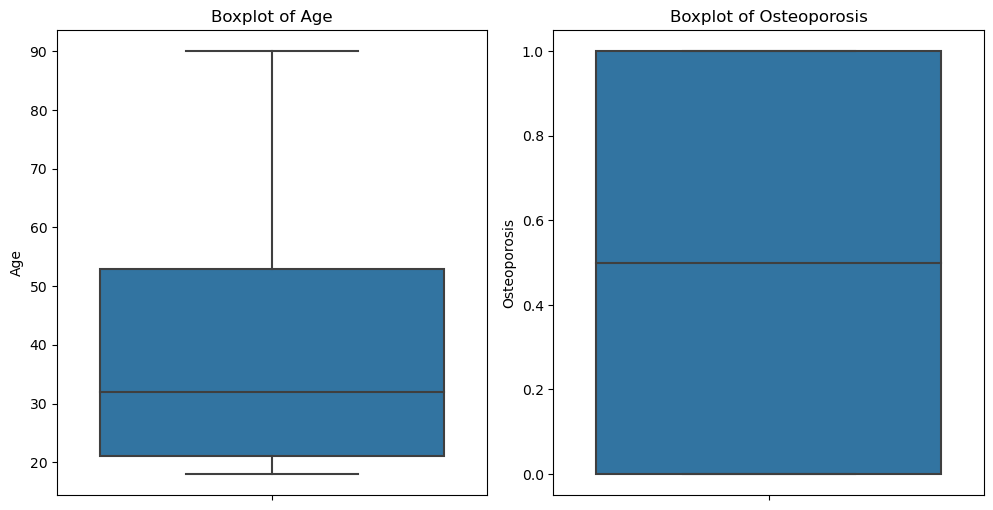

In [38]:
# Boxplot 
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

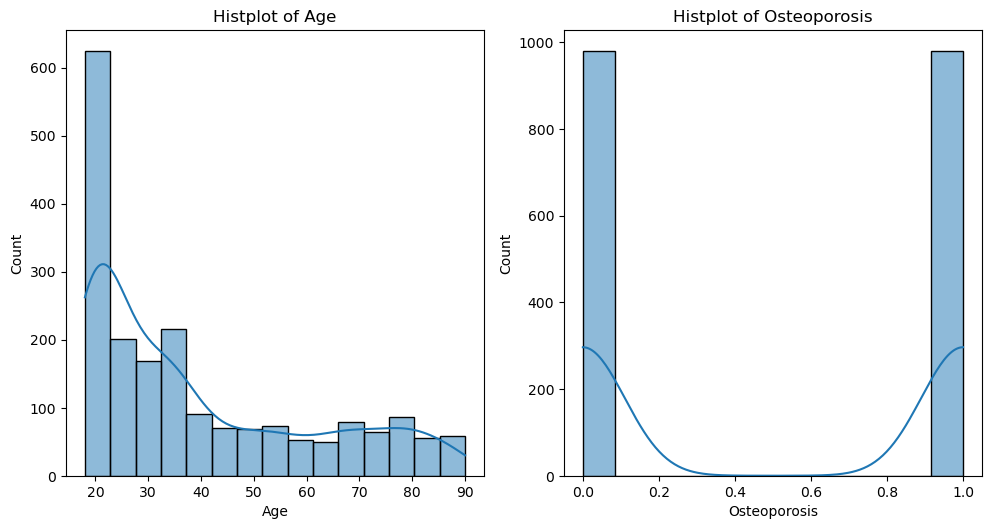

In [39]:
# Histplot 
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histplot of {col}')
plt.tight_layout()
plt.show()

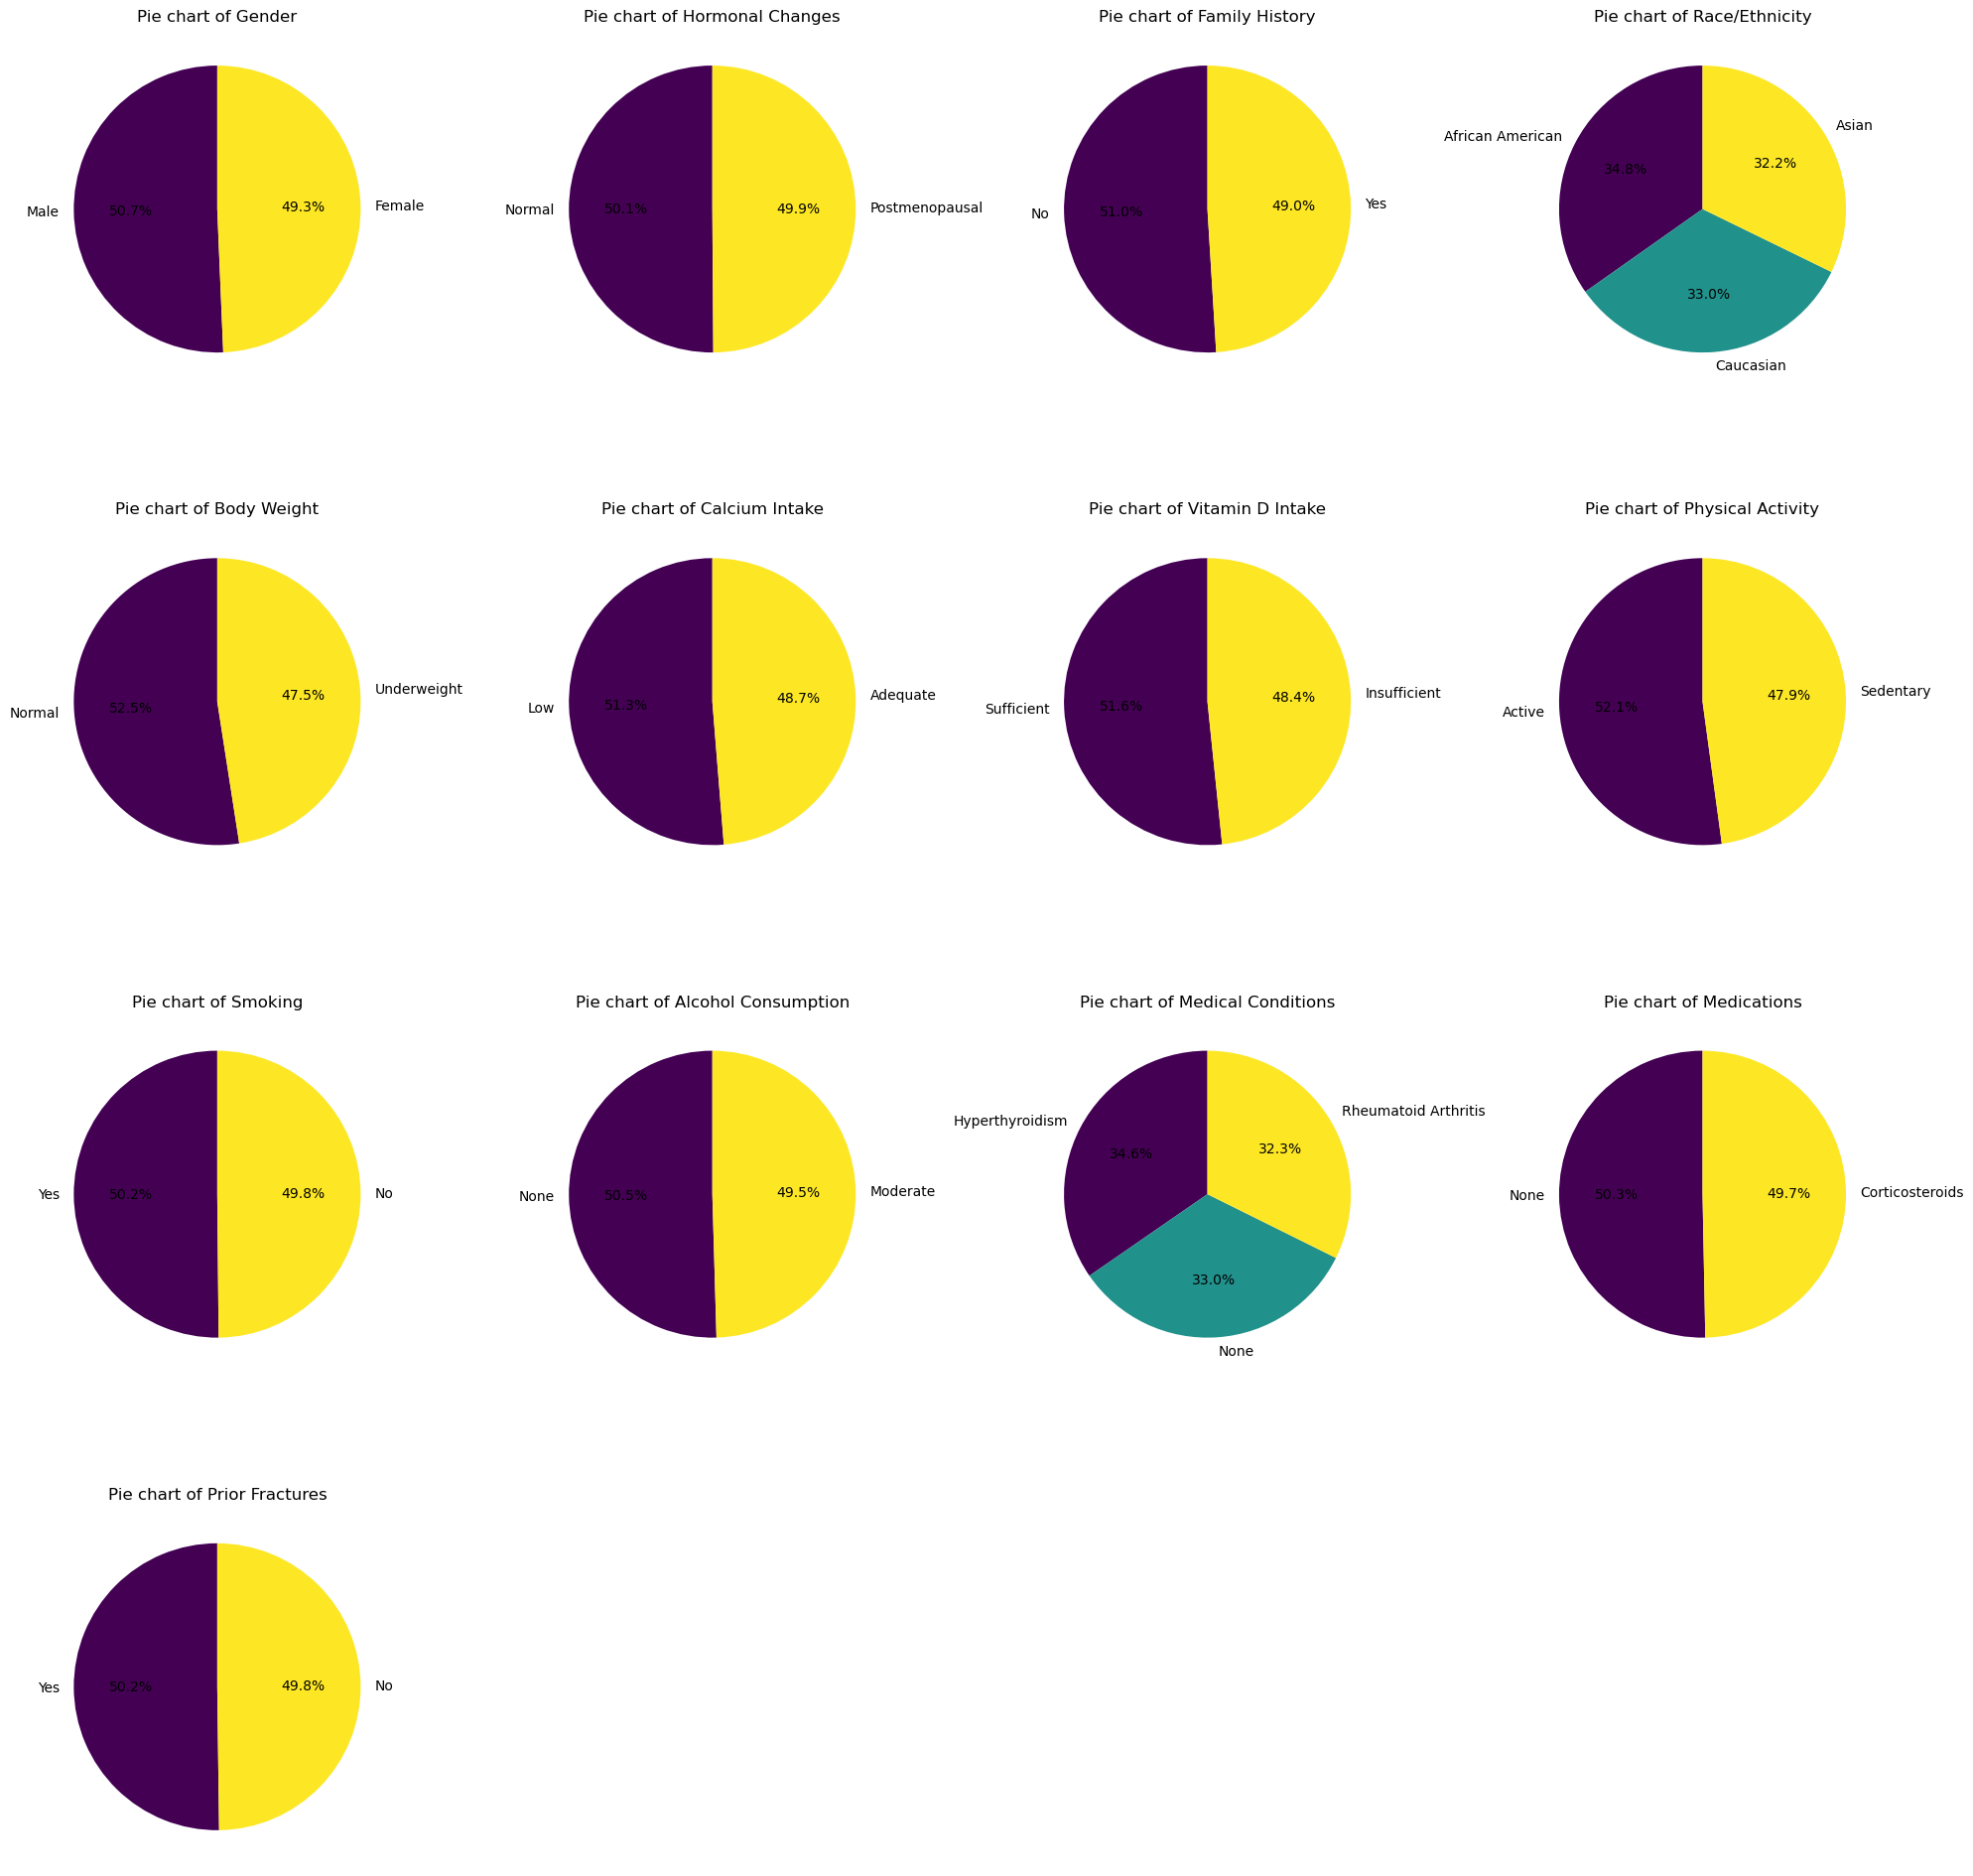

In [40]:
# Plot pie charts for all categorical variables
plt.figure(figsize=(20, 20))
for i, col in enumerate(categorical_features ):
    plt.subplot(4, 4, i + 1)  # Adjusting layout to fit all pie charts
    df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
    plt.title(f'Pie chart of {col}')
    plt.ylabel('')  # Hide y-axis label for cleaner look
plt.tight_layout()
plt.show()

## 11.Feature Engineering

### Label Encoding

In [41]:

# Import the LabelEncoder class from the preprocessing module of scikit-learn
from sklearn.preprocessing import LabelEncoder

# Encode categorical features 
for feature in categorical_features:
    label_encoder  = LabelEncoder()
    df[feature] =label_encoder .fit_transform(df[feature])
df    

,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,69,0,0,1,1,1,1,1,1,1,0,2,0,1,1
1,32,0,0,1,1,1,1,1,1,0,1,1,1,1,1
2,89,0,1,0,2,0,0,1,0,0,0,0,0,0,1
3,78,0,0,0,2,1,0,0,1,1,1,2,0,0,1
4,38,1,1,1,0,0,1,1,0,1,1,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,19,0,0,1,0,0,0,1,1,1,0,2,1,1,0
1954,23,0,1,1,2,1,1,0,0,0,1,1,0,0,0
1955,34,0,1,0,0,1,1,1,1,0,1,0,1,0,0
1956,25,1,1,0,0,0,1,0,1,1,1,2,0,1,0


### Feature Scaling

In [42]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns for scaling
columns=[ 'Age', 'Gender', 'Hormonal Changes', 'Family History','Race/Ethnicity', 'Body Weight', 'Calcium Intake', 'Vitamin D Intake','Physical Activity', 'Smoking', 'Alcohol Consumption','Medical Conditions', 'Medications', 'Prior Fractures', 'Osteoporosis']

# Create a scaler object
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[columns])

# Convert scaled data to DataFrame
scaled_df = pd.DataFrame(df_scaled, columns=columns)

df[columns] = scaled_df

df

,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,0.708333,0.0,0.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
1,0.194444,0.0,0.0,1.0,0.5,1.0,1.0,1.0,1.0,0.0,1.0,0.5,1.0,1.0,1.0
2,0.986111,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.833333,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
4,0.277778,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,0.013889,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
1954,0.069444,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.5,0.0,0.0,0.0
1955,0.222222,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1956,0.097222,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0


In [43]:
# Calculate the correlation matrix

correlation_matrix = df.corr()
correlation_matrix 

,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
Age,1.000000,0.015105,0.005464,-0.016848,-0.029398,0.017046,0.002128,0.019184,0.020651,0.027591,-0.004541,0.004140,0.006861,-0.023989,0.691238
Gender,0.015105,1.000000,-0.018361,0.019671,0.015803,0.010880,-0.009536,0.022052,0.027155,-0.039881,0.015202,0.025976,-0.004168,-0.016399,0.012258
Hormonal Changes,0.005464,-0.018361,1.000000,0.020393,-0.034173,-0.007259,-0.016296,-0.000955,-0.019513,-0.006122,0.006148,-0.023160,0.001034,0.011244,0.015322
Family History,-0.016848,0.019671,0.020393,1.000000,0.015095,0.003139,0.024001,-0.009587,-0.023330,-0.013222,-0.002887,0.021313,0.006249,-0.006051,-0.002043
Race/Ethnicity,-0.029398,0.015803,-0.034173,0.015095,1.000000,0.008253,0.012349,-0.012328,0.000931,-0.032822,-0.012832,-0.013507,-0.002970,-0.000532,-0.006826
Body Weight,0.017046,0.010880,-0.007259,0.003139,0.008253,1.000000,-0.015114,-0.013743,0.021435,0.008332,-0.020003,-0.038263,-0.041630,0.005314,0.035794
Calcium Intake,0.002128,-0.009536,-0.016296,0.024001,0.012349,-0.015114,1.000000,-0.025371,0.011324,-0.035841,-0.013519,0.008838,0.005974,-0.012366,-0.004087
Vitamin D Intake,0.019184,0.022052,-0.000955,-0.009587,-0.012328,-0.013743,-0.025371,1.000000,0.035161,0.008076,0.001743,0.010290,0.017174,-0.013420,0.017374
Physical Activity,0.020651,0.027155,-0.019513,-0.023330,0.000931,0.021435,0.011324,0.035161,1.000000,-0.026451,-0.001650,-0.025581,0.034003,-0.049922,0.019425
Smoking,0.027591,-0.039881,-0.006122,-0.013222,-0.032822,0.008332,-0.035841,0.008076,-0.026451,1.000000,-0.003093,0.023189,-0.000019,-0.022485,-0.016343


<Axes: >

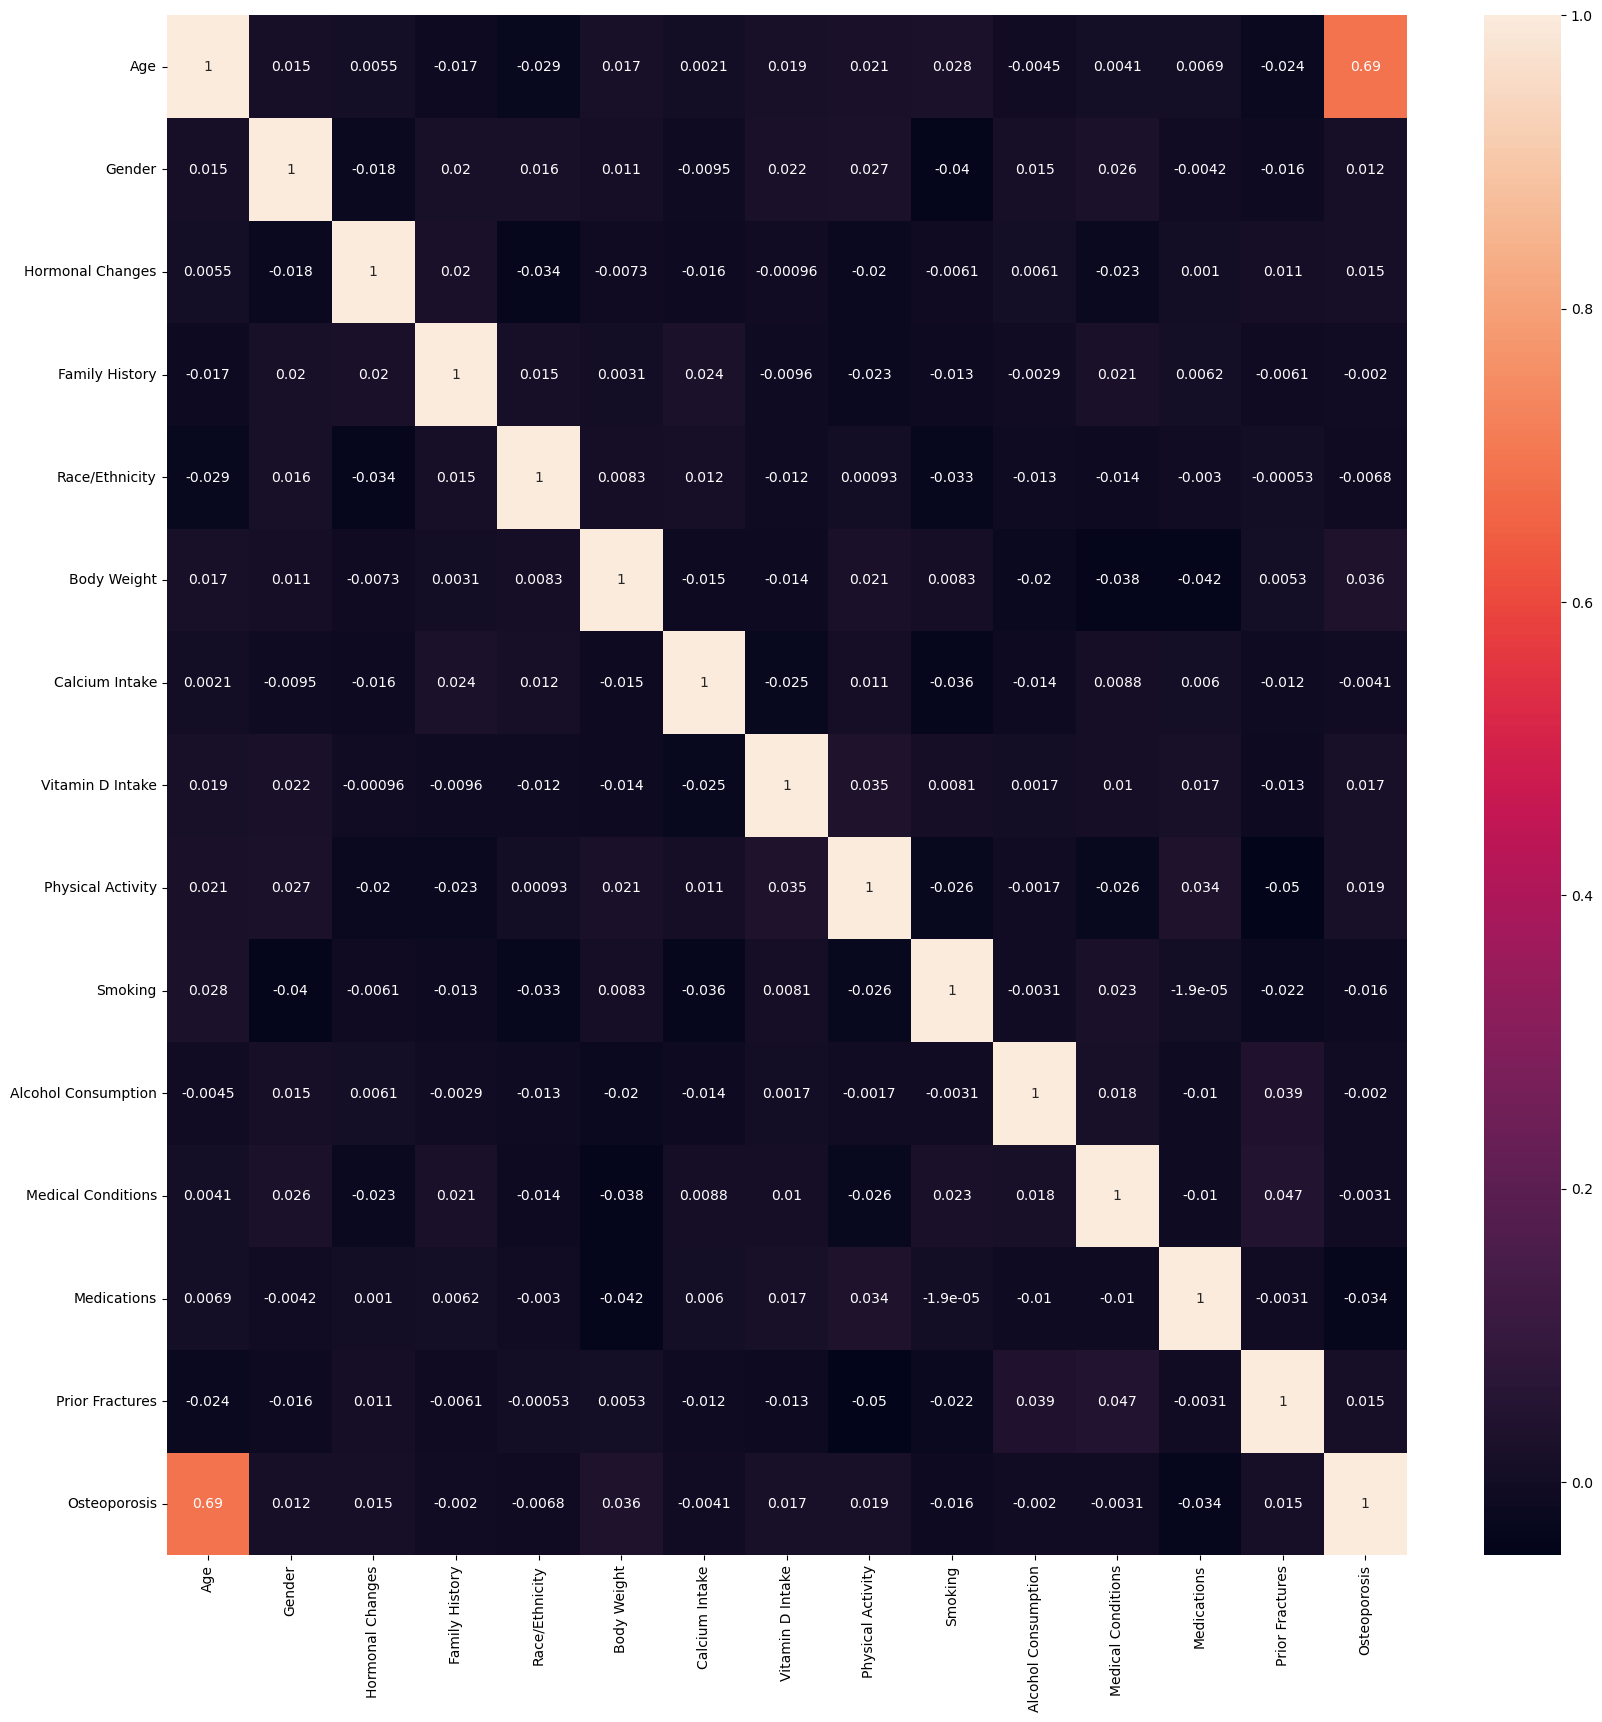

In [44]:
#Create a heatmap using seaborn's heatmap function
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True)

>All pairs of variables, except for Age, show correlation values close to 0, indicating no significant relationships between most variables. The strongest correlation observed is between Osteoporosis and Age, with a correlation coefficient of 0.69, indicating a moderate positive relationship. This suggests that age may play a role in the development of osteoporosis, whereas other factors such as gender, hormonal changes, family history, race/ethnicity, and lifestyle factors like body weight, calcium intake, and physical activity show negligible correlations with osteoporosis risk in this dataset.

# 12. Data Splitting

In [45]:
# Split dataset into features and target variable
x = df.drop('Osteoporosis', axis=1)
y = df['Osteoporosis']

In [46]:
#Input features
x

,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures
0,0.708333,0.0,0.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
1,0.194444,0.0,0.0,1.0,0.5,1.0,1.0,1.0,1.0,0.0,1.0,0.5,1.0,1.0
2,0.986111,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.833333,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
4,0.277778,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,0.013889,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
1954,0.069444,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.5,0.0,0.0
1955,0.222222,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1956,0.097222,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0


In [47]:
# Target variable
y

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1953    0.0
1954    0.0
1955    0.0
1956    0.0
1957    0.0
Name: Osteoporosis, Length: 1958, dtype: float64

In [48]:
# Splitting the dataset into 70-30 that is , 70% of the data is for training and 30% of the data is for testing

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# 13. Model Selection, 14.Model Training

### 1.Logistic Regression

In [49]:
# Import the LogisticRegression class from the linear_model module of scikit-learn
from sklearn.linear_model import LogisticRegression

#Creating logistic regression object
Logistic_model = LogisticRegression()

#Fitting the data
Logistic_model.fit(x_train, y_train)


# Training accuracy
print("Training accuracy:", Logistic_model.score(x_train, y_train))

# Prediction
Logistic_model_pred = Logistic_model.predict(x_test)

# Testing accuracy
print("Testing accuracy:",Logistic_model.score(x_test,y_test)) #accuracy_score(y_test, Logistic_model_pred ) 
        


Training accuracy: 0.8423357664233576
Testing accuracy: 0.8299319727891157


>This method predicts whether an instance belongs to one of two groups by fitting a logistic curve to the data and using that curve to make decisions.


> Predicting if a patient has osteoporosis (yes or no) based on their health data



### 2.Decision Tree Classifier

In [50]:
# Import the DecisionTreeClassifier class from the tree module of scikit-learn
from sklearn.tree import DecisionTreeClassifier

#Creating Decision Tree Classifier object
Decision_model = DecisionTreeClassifier()

#Fitting the data
Decision_model.fit(x_train, y_train)

# Training accuracy
train_accuracy_dt = Decision_model.score(x_train, y_train)
print("Training accuracy for Decision Tree:", train_accuracy_dt)

# Prediction
Decision_model_pred =Decision_model.predict(x_test)

# Testing accuracy
test_accuracy_dt = accuracy_score(y_test,Decision_model_pred)
print("Testing accuracy for Decision Tree:", test_accuracy_dt)


Training accuracy for Decision Tree: 0.9985401459854014
Testing accuracy for Decision Tree: 0.8282312925170068


>A decision tree splits data into branches based on feature values, forming a tree structure of decisions. It classifies data by asking a series of yes/no questions, each splitting the data into smaller groups until a final decision is made.


>Predicting osteoporosis by asking a series of yes/no questions about a patient’s health and lifestyle.

### 3.Random Forest Classifier

In [51]:
# Import the RandomForestClassifier class from the ensemble module of scikit-learn
from sklearn.ensemble import RandomForestClassifier

#Creating Random Forest Classifier object
RF_model = RandomForestClassifier()

#Fitting the data
RF_model.fit(x_train, y_train)

# Training accuracy
train_accuracy = RF_model.score(x_train, y_train)
print("Training accuracy:", train_accuracy)

# Prediction on test data
RF_model_pred = RF_model.predict(x_test)

# Testing accuracy
test_accuracy_RF = accuracy_score(y_test, RF_model_pred)
print("Testing accuracy:", test_accuracy_RF)






Training accuracy: 0.9985401459854014
Testing accuracy: 0.8469387755102041


>Random Forest is an ensemble learning method that constructs multiple decision trees and combines their outputs. Each tree votes on the outcome, and the final decision is made by taking the majority vote from all the trees. This approach improves accuracy and reduces the risk of overfitting compared to using a single decision tree.

>Combining multiple decision trees to make a more accurate prediction of osteoporosis risk.>

### 4. K Nearest Neighbour(KNN)

In [52]:
# Import the KNeighborsClassifier class from the neighbors module of scikit-learn
from sklearn.neighbors import KNeighborsClassifier

#Creating  K Nearest Neighbour object
KNN_model=KNeighborsClassifier()

#Fitting the data
KNN_model.fit(x_train,y_train)

# Training accuracy
train_accuracy_knn = KNN_model.score(x_train, y_train)
print("Training accuracy for K-Nearest Neighbors:", train_accuracy_knn)

# Prediction
KNN_model_pred = KNN_model.predict(x_test)

# Testing accuracy
test_accuracy_knn = accuracy_score(y_test, KNN_model_pred)
print("Testing accuracy for K-Nearest Neighbors:", test_accuracy_knn)


Training accuracy for K-Nearest Neighbors: 0.7802919708029197
Testing accuracy for K-Nearest Neighbors: 0.6428571428571429


>K-Nearest Neighbors (KNN) classifies data points based on their closeness to the nearest neighbors in the feature space. It assigns a data point to the most common group among its closest neighbors, using their closeness to make classification decisions.



>Predicting osteoporosis by looking at the health data of the closest similar patients.

### 5. Naive Baye's

In [53]:
# Import the GaussianNB class from the naive_bayes module of scikit-learn
from sklearn.naive_bayes import GaussianNB

#CreatingNaive Baye's object
NB_model = GaussianNB()

#Fitting the data
NB_model.fit(x_train, y_train)

# Training accuracy
train_accuracy = NB_model.score(x_train, y_train)
print("Training accuracy:", train_accuracy)

# Prediction on test data
NB_model_pred = NB_model.predict(x_test)

# Testing accuracy
test_accuracy_NB = accuracy_score(y_test, NB_model_pred)
print("Testing accuracy:", test_accuracy_NB)


Training accuracy: 0.8547445255474453
Testing accuracy: 0.858843537414966


>Naive Bayes classifies data using probability based on past occurrences, assuming each feature contributes independently to the outcome.


>Predicting osteoporosis by calculating the likelihood based on individual features like age, gender, etc.


### 6.Support Vector Classifier

In [54]:
# Import the SVC class from the svm module of scikit-learn
from sklearn.svm import SVC

#Creating Support Vector Classifier Classifier object
SVC_model = SVC()

#Fitting the data
SVC_model.fit(x_train, y_train)

# Training accuracy
print("Training accuracy:", SVC_model.score(x_train, y_train))

# Prediction
SVC_model_pred = SVC_model.predict(x_test)

print("Testing accuracy:",SVC_model.score(x_test,y_test)) #accuracy_score(y_test,SVC_model_pred )

Training accuracy: 0.8722627737226277
Testing accuracy: 0.826530612244898


>Support Vector Machine (SVM) finds the optimal boundary (hyperplane) that separates two groups of data points. It aims to maximize the margin, or distance, between these groups to enhance the accuracy of predictions.

>Separating patients with osteoporosis from those without by finding the optimal dividing line in the feature space.

### 7.Gradient Boosting Classifier

In [55]:
# Import the GradientBoostingClassifier class from the ensemble module of scikit-learn
from sklearn.ensemble import GradientBoostingClassifier

#Creating Gradient Boosting Classifier object
GB_model = GradientBoostingClassifier(random_state=42)

#Fitting the data
GB_model.fit(x_train, y_train)

# Training accuracy
train_accuracy = GB_model.score(x_train, y_train)
print("Training accuracy:", train_accuracy)

# Prediction on test data
GB_model_pred = GB_model.predict(x_test)

# Testing accuracy
test_accuracy_GB = accuracy_score(y_test, GB_model_pred)
print("Testing accuracy:", test_accuracy_GB)

Training accuracy: 0.910948905109489
Testing accuracy: 0.9200680272108843


>The Gradient Boosting Classifier constructs a sequence of models where each new model corrects the errors of its previous one. Meanwhile, Gradient Descent minimizes the model's loss function by iteratively adjusting parameters in the direction of the gradient.

>Improving osteoporosis predictions by sequentially refining the model to correct past mistakes.

### 8.AdaBoost Classifier

In [56]:
# Import the AdaBoostClassifier class from the ensemble module of scikit-learn
from sklearn.ensemble import AdaBoostClassifier

#Creating AdaBoost Classifier object
AB_model = AdaBoostClassifier(random_state=42)

#Fitting the data
AB_model.fit(x_train, y_train)

# Training accuracy
train_accuracy = AB_model.score(x_train, y_train)
print("Training accuracy:", train_accuracy)

# Prediction
AB_model_pred = AB_model.predict(x_test)

# Testing accuracy
test_accuracy_AB = accuracy_score(y_test,AB_model_pred)
print("Testing accuracy :", test_accuracy_AB)



Training accuracy: 0.9065693430656935
Testing accuracy : 0.9115646258503401


>An ensemble method that focuses on difficult cases by adjusting weights and combining multiple weak classifiers.

>The AdaBoost algorithm enhances osteoporosis prediction by iteratively combining multiple weak classifiers, adjusting their focus on challenging instances, and aggregating their predictions into a robust model. This ensemble approach improves accuracy by emphasizing the contributions of more accurate models in predicting osteoporosis risk.

### 9.MLP (Multi-layer Perceptron) classifier

In [57]:
# Import the MLPClassifier class from the neural_network module of scikit-learn
from sklearn.neural_network import MLPClassifier

#Creating MLP (Multi-layer Perceptron) classifier object
MLP_model = MLPClassifier(random_state=42)

#Fitting the data
MLP_model.fit(x_train, y_train)

# Training accuracy
train_accuracy = MLP_model.score(x_train, y_train)
print("Training accuracy:", train_accuracy)

# Prediction on test data
MLP_model_pred = MLP_model.predict(x_test)

# Testing accuracy
test_accuracy_MLP = accuracy_score(y_test, MLP_model_pred)
print("Testing accuracy:", test_accuracy_MLP)


Training accuracy: 0.8708029197080291
Testing accuracy: 0.8163265306122449


> A type of neural network with multiple layers that can learn complex patterns.


>Using a network of neurons to understand the complex relationships between various health factors and osteoporosis.

# 15.Model Evaluation

###  Model Training & Evaluation (Without feature Selection & Hyperparameter Tuning)

### 1.Model Accuracy ,Precision	,Recall	,F1-Score & ROC AUC

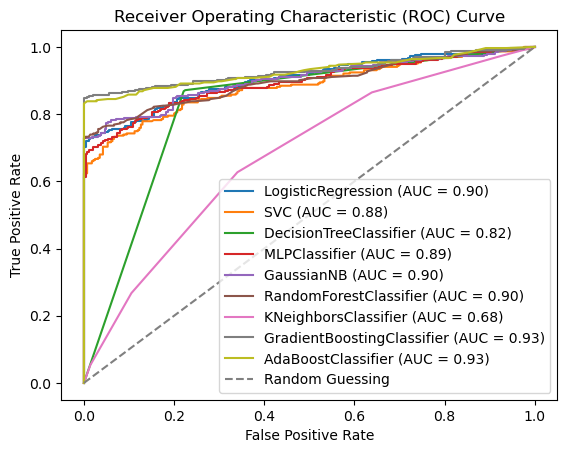

,Accuracy,Precision,Recall,F1-Score,ROC AUC
Model-Name,,,,,
GradientBoostingClassifier,0.920068,1.000000,0.844884,0.915921,0.929141
AdaBoostClassifier,0.911565,1.000000,0.828383,0.906137,0.927474
GaussianNB,0.858844,0.933071,0.782178,0.850987,0.902009
RandomForestClassifier,0.852041,0.935484,0.765677,0.842105,0.896341
LogisticRegression,0.829932,0.877323,0.778878,0.825175,0.904487
SVC,0.826531,0.920502,0.726073,0.811808,0.882815
DecisionTreeClassifier,0.824830,0.806748,0.867987,0.836248,0.824521
MLPClassifier,0.823129,0.849123,0.798680,0.823129,0.892537
KNeighborsClassifier,0.642857,0.662021,0.627063,0.644068,0.679723


In [58]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming `x_train`, `x_test`, `y_train`, `y_test`, and `models` are defined as per your code snippet

# Initialize the classifiers
models = [
    LogisticRegression(),
    SVC(probability=True),  # SVC needs probability=True for roc_curve
    DecisionTreeClassifier(),
    MLPClassifier(),
    GaussianNB(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier()
]

# Lists to store evaluation metrics
model_names = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_aucs = []

# Train and evaluate each model
for model in models:
    model.fit(x_train, y_train)
    
    # Make predictions
    pred = model.predict(x_test)
    
    # Append model name
    model_names.append(model.__class__.__name__)
    
    # Calculate metrics
    accuracy_scores.append(accuracy_score(y_test, pred))
    precision_scores.append(precision_score(y_test, pred))
    recall_scores.append(recall_score(y_test, pred))
    f1_scores.append(f1_score(y_test, pred))
    
    # Calculate ROC AUC
    if hasattr(model, "predict_proba"):
        proba = model.predict_proba(x_test)[:, 1]
    else:  # use decision function
        proba = model.decision_function(x_test)
        proba = (proba - proba.min()) / (proba.max() - proba.min())
    
    roc_auc = roc_auc_score(y_test, proba)
    roc_aucs.append(roc_auc)
    
    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, proba)
    plt.plot(fpr, tpr, label=f'{model.__class__.__name__} (AUC = {roc_auc:.2f})')

# Plot ROC curve for random guessing (chance)
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guessing')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Create a DataFrame to store the results
models_df = pd.DataFrame({
    "Model-Name": model_names,
    "Accuracy": accuracy_scores,
    "Precision": precision_scores,
    "Recall": recall_scores,
    "F1-Score": f1_scores,
    "ROC AUC": roc_aucs
})

models_df = models_df.set_index('Model-Name')
models_df.sort_values("Accuracy", ascending=False, inplace=True)
models_df


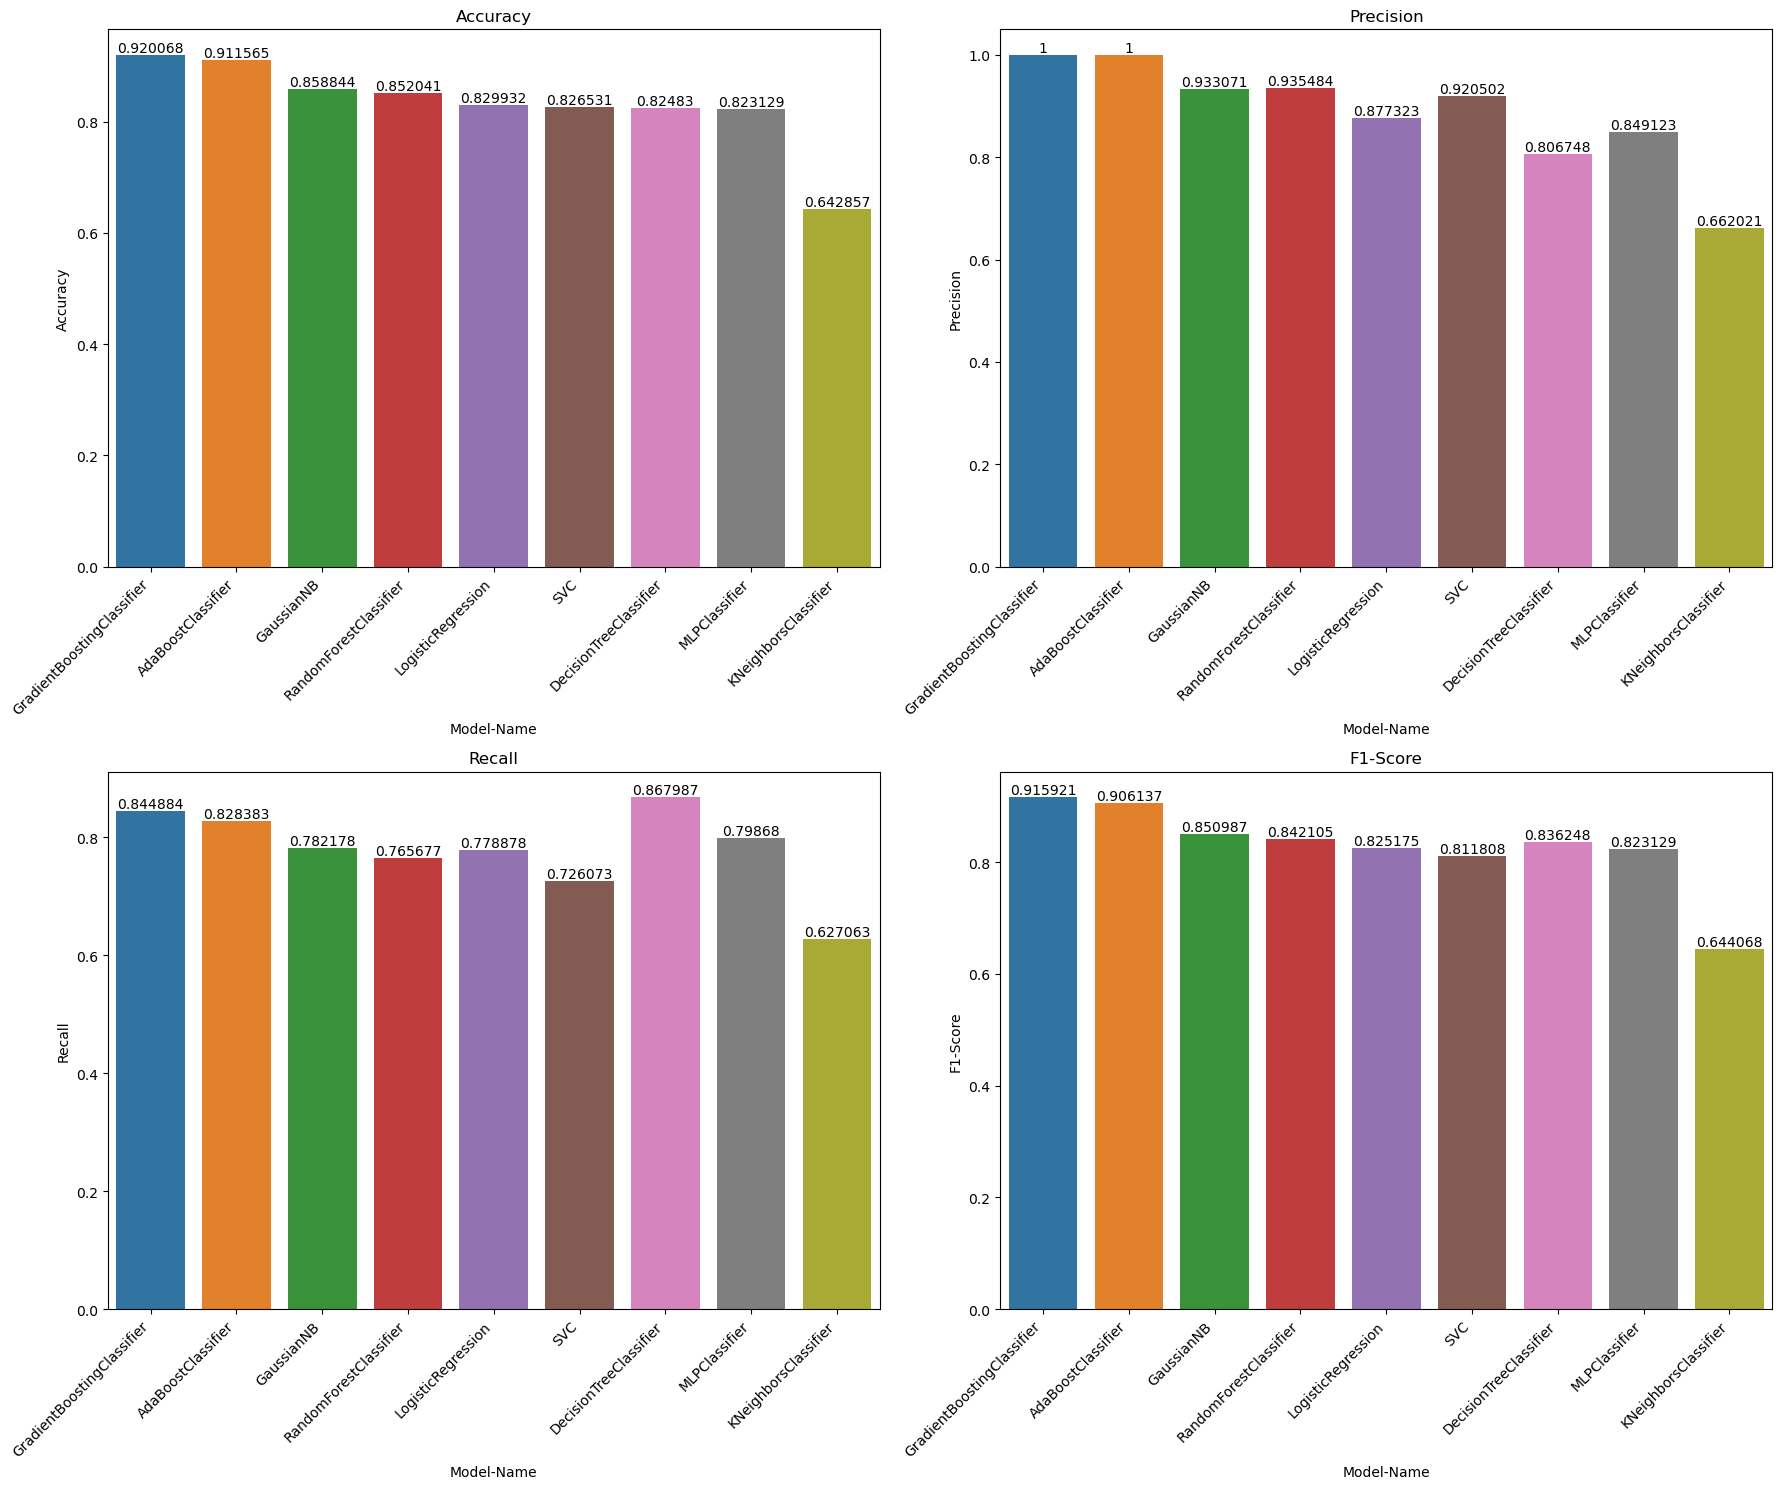

In [59]:
# Plotting the evaluation metrics

fig, axes = plt.subplots(2, 2, figsize=(18, 15))

# Accuracy
sns.barplot(x=models_df.index, y=models_df['Accuracy'], ax=axes[0, 0])
axes[0, 0].set_title('Accuracy')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha='right')
for container in axes[0, 0].containers:
    axes[0, 0].bar_label(container)

# Precision
sns.barplot(x=models_df.index, y=models_df['Precision'], ax=axes[0, 1])
axes[0, 1].set_title('Precision')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha='right')
for container in axes[0, 1].containers:
    axes[0, 1].bar_label(container)

# Recall
sns.barplot(x=models_df.index, y=models_df['Recall'], ax=axes[1, 0])
axes[1, 0].set_title('Recall')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha='right')
for container in axes[1, 0].containers:
    axes[1, 0].bar_label(container)

# F1-Score
sns.barplot(x=models_df.index, y=models_df['F1-Score'], ax=axes[1, 1])
axes[1, 1].set_title('F1-Score')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45, ha='right')
for container in axes[1, 1].containers:
    axes[1, 1].bar_label(container)

plt.tight_layout()
plt.show()

### 2.Confusion Matrix

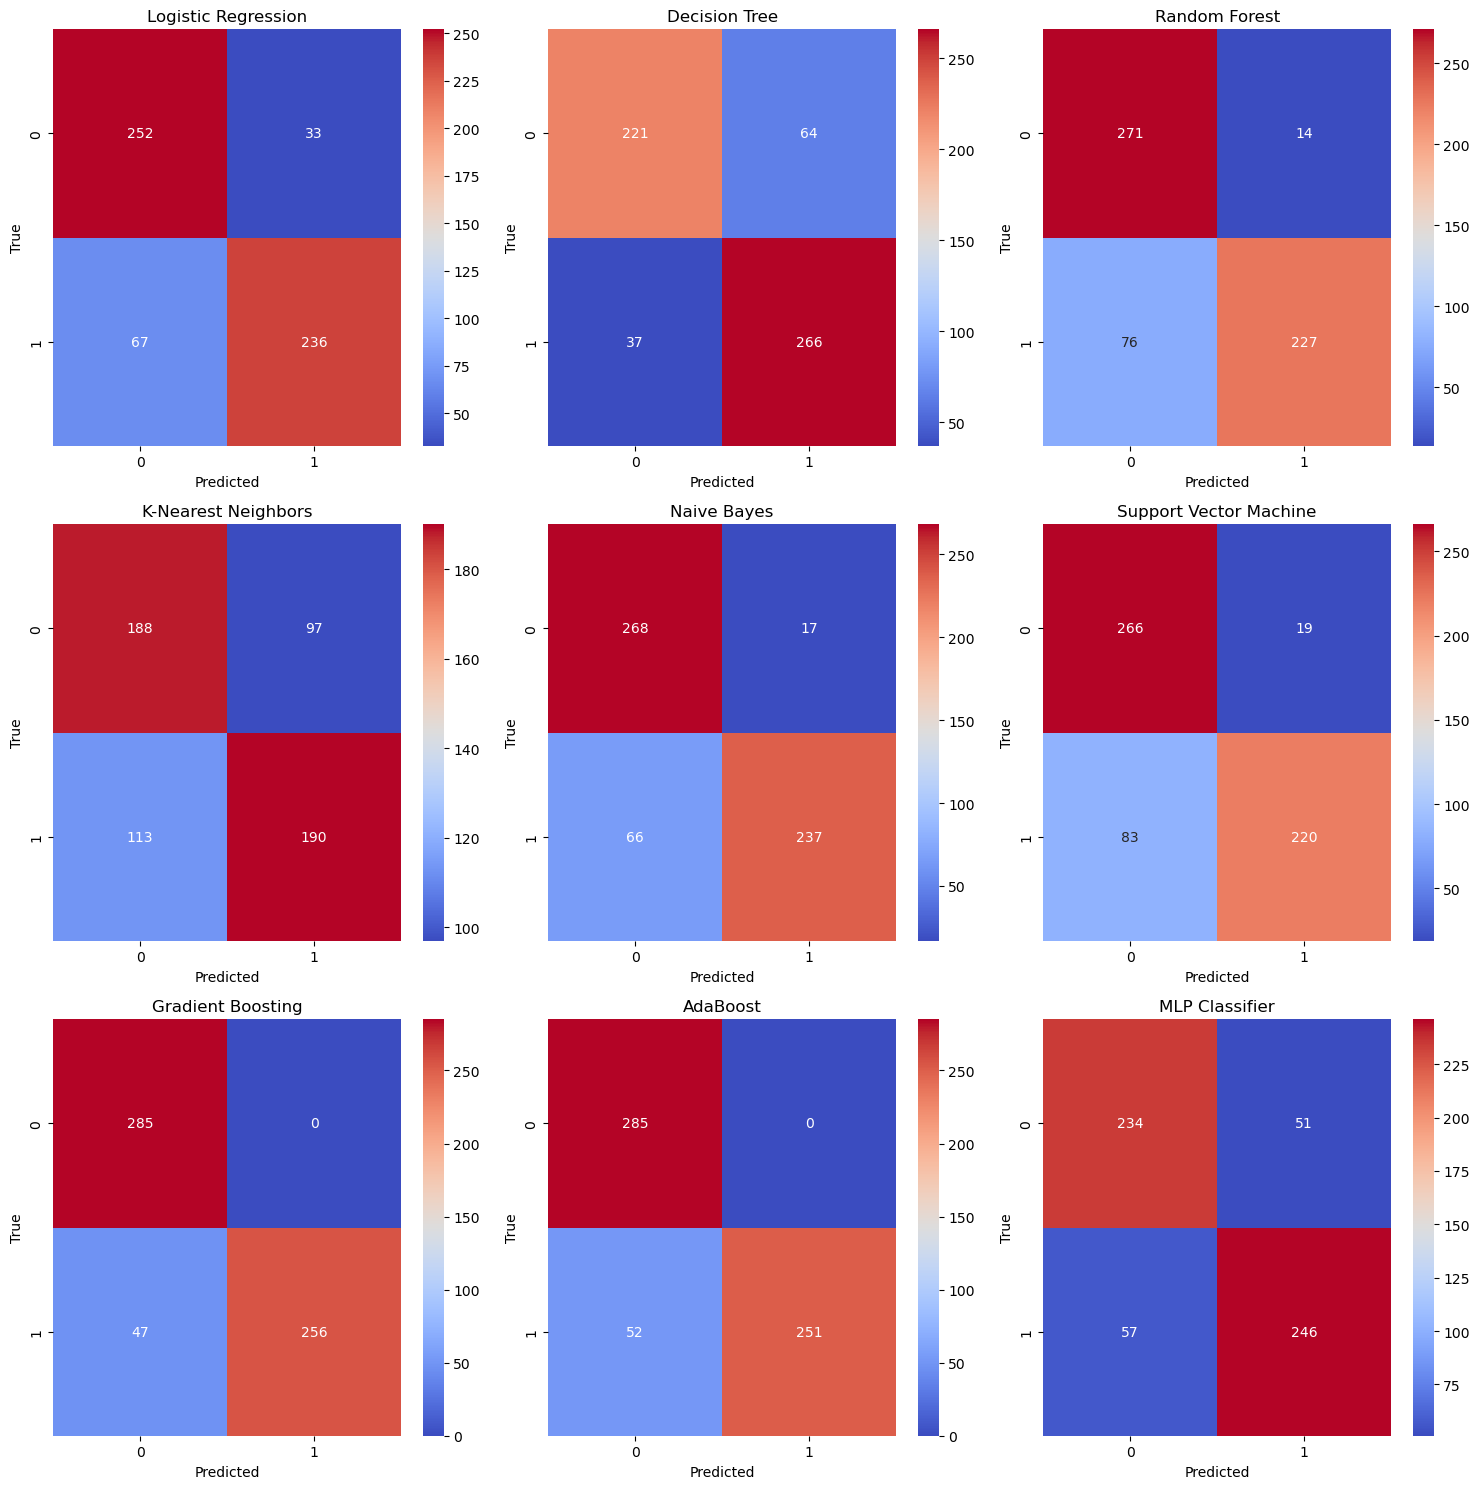

In [60]:
from sklearn.metrics import confusion_matrix

# Define a function to plot confusion matrix

def plot_confusion_matrix(y_true, y_pred, title, ax):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, ax=ax, fmt='g', cmap='coolwarm')
    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

# Create subplots for confusion matrices
fig, ax = plt.subplots(3, 3, figsize=(15, 15))

# Confusion matrix for Logistic Regression
plot_confusion_matrix(y_test, Logistic_model_pred, 'Logistic Regression', ax=ax[0, 0])


# Confusion matrix for Decision Tree
plot_confusion_matrix(y_test, Decision_model_pred, 'Decision Tree', ax=ax[0, 1])


# Confusion matrix for Random Forest
plot_confusion_matrix(y_test, RF_model_pred, 'Random Forest', ax=ax[0, 2])

# Confusion matrix for K-Nearest Neighbors
plot_confusion_matrix(y_test, KNN_model_pred, 'K-Nearest Neighbors', ax=ax[1, 0])

# Confusion matrix for Naive Bayes
plot_confusion_matrix(y_test, NB_model_pred, 'Naive Bayes', ax=ax[1, 1])

# Confusion matrix for SVM
plot_confusion_matrix(y_test, SVC_model_pred, 'Support Vector Machine', ax=ax[1, 2])

                                                                                                                            
# Confusion matrix for Gradient Boosting
plot_confusion_matrix(y_test, GB_model_pred, 'Gradient Boosting', ax=ax[2, 0])

                                                                    
# Confusion matrix for AdaBoost
plot_confusion_matrix(y_test, AB_model_pred, 'AdaBoost', ax=ax[2, 1])

                                                                    
# Confusion matrix for MLP (Multi-layer Perceptron) classifier
plot_confusion_matrix(y_test, MLP_model_pred, 'MLP Classifier', ax=ax[2, 2])

plt.tight_layout()
plt.show()

### Finding the feature importance using Gradient Boosting model

In [61]:
# Extract feature importances
feature_importances = GB_model.feature_importances_

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]

# Print feature importances
print("Feature Importances:")
for idx in sorted_indices:
    print(f"{x.columns[idx]}: {feature_importances[idx]}")

Feature Importances:
Age: 0.9741770550340919
Smoking: 0.003413780190810877
Prior Fractures: 0.0033572318367606348
Medications: 0.0030855927756946234
Medical Conditions: 0.0028417413924551635
Race/Ethnicity: 0.0023325623257424645
Body Weight: 0.0017611220949590835
Gender: 0.0016609576871180884
Family History: 0.0016323768278478533
Calcium Intake: 0.0015295085831200667
Hormonal Changes: 0.0012870790314341001
Alcohol Consumption: 0.0011471440954156477
Physical Activity: 0.001007243761574328
Vitamin D Intake: 0.0007666043629750653


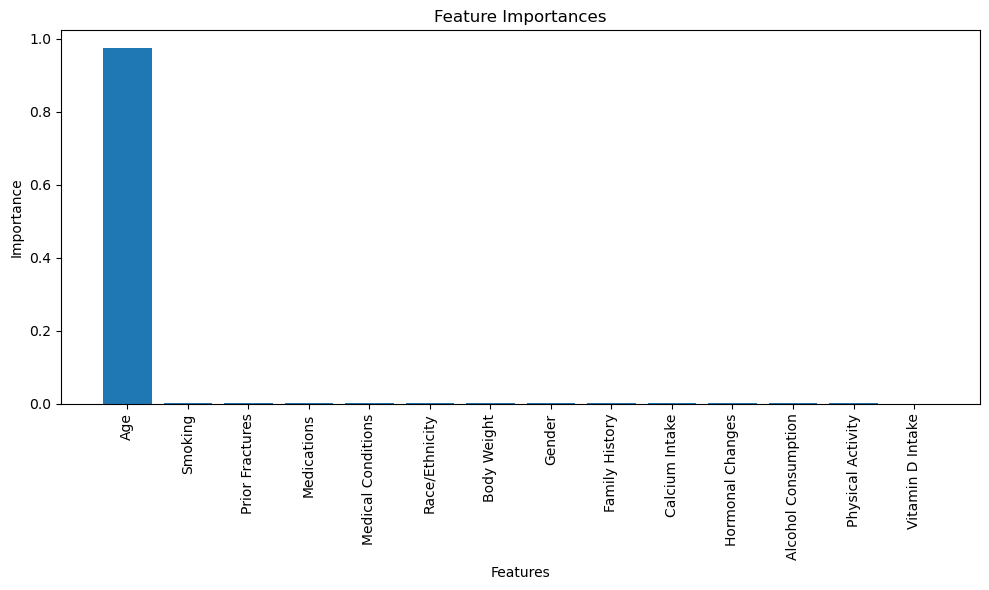

In [62]:
import matplotlib.pyplot as plt

# Assuming you have a trained Gradient Boosting model named GB_model
feature_importances = GB_model.feature_importances_

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]
sorted_features = [x.columns[idx] for idx in sorted_indices]
sorted_importances = [feature_importances[idx] for idx in sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(sorted_features, sorted_importances)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()


# 16. Feature Selection

### 1.SelectKBest


In [63]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd
import numpy as np

# Assume x_train and y_train are your training data
# x_train should be a pandas DataFrame containing your features
# y_train should be a pandas Series containing your target variable

# Initialize SelectKBest with f_classif scoring function and select top 10 features
selector = SelectKBest(score_func=f_classif, k=10)

# Fit selector to training data and transform X to select the top k features
x_selected = selector.fit_transform(x_train, y_train)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features from the original DataFrame
selected_features = np.array(x.columns)[selected_indices]

# Print the names of the selected features
print("Selected Features:")
print(selected_features)


Selected Features:
['Age' 'Gender' 'Hormonal Changes' 'Family History' 'Race/Ethnicity'
 'Body Weight' 'Physical Activity' 'Smoking' 'Medications'
 'Prior Fractures']


### Train the models with selected features using SelectKBest

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Corrected code with commas separating the column names
x1 = df[['Age' ,'Gender' ,'Hormonal Changes', 'Family History' ,'Race/Ethnicity',
 'Body Weight', 'Physical Activity' ,'Smoking', 'Medications',
 'Prior Fractures']]

# Assuming 'y' is the target variable
# Split the dataset into training and testing sets
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, test_size=0.3, random_state=42)

# Initialize the classifiers
models = [
    LogisticRegression(),
    SVC(probability=True),
    DecisionTreeClassifier(),
    MLPClassifier(max_iter=1000),
    GaussianNB(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier()
]

# Lists to store evaluation metrics
model_names = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []


# Train and evaluate each model
for model in models:
    model.fit(x1_train, y1_train)
    pred = model.predict(x1_test)
    
    model_names.append(model.__class__.__name__)
    accuracy_scores.append(accuracy_score(y1_test, pred))
    precision_scores.append(precision_score(y1_test, pred))
    recall_scores.append(recall_score(y1_test, pred))
    f1_scores.append(f1_score(y1_test, pred))

# Create a DataFrame to store the results
models_df = pd.DataFrame({
    "Model-Name": model_names,
    "Accuracy": accuracy_scores,
    "Precision": precision_scores,
    "Recall": recall_scores,
    "F1-Score": f1_scores
})

models_df = models_df.set_index('Model-Name')
models_df.sort_values("Accuracy", ascending=False, inplace=True)
models_df

,Accuracy,Precision,Recall,F1-Score
Model-Name,,,,
GradientBoostingClassifier,0.921769,1.000000,0.848185,0.917857
AdaBoostClassifier,0.911565,1.000000,0.828383,0.906137
GaussianNB,0.858844,0.933071,0.782178,0.850987
RandomForestClassifier,0.858844,0.926357,0.788779,0.852050
MLPClassifier,0.850340,0.885305,0.815182,0.848797
DecisionTreeClassifier,0.848639,0.836478,0.877888,0.856683
LogisticRegression,0.829932,0.877323,0.778878,0.825175
SVC,0.829932,0.939394,0.716172,0.812734
KNeighborsClassifier,0.670068,0.708812,0.610561,0.656028


### 2. Feature selection using Random forest classifier


In [65]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np


# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


# Fit the classifier to your data
rf_classifier.fit(x_train,y_train)


# Get feature importances from the trained Random Forest model
feature_importances = rf_classifier.feature_importances_


# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]


# Select the top k features (e.g., top 12 features)
k = 12
selected_indices = sorted_indices[:k]


# Get the names of the selected features
selected_features =np.array(x.columns)[selected_indices]


# Print the names of the selected features
print("Selected Features:")
print(selected_features)


Selected Features:
['Age' 'Race/Ethnicity' 'Medical Conditions' 'Calcium Intake'
 'Physical Activity' 'Prior Fractures' 'Medications' 'Hormonal Changes'
 'Alcohol Consumption' 'Smoking' 'Gender' 'Family History']


### Train the models with selected features using Random forest classifier

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Corrected code with commas separating the column names
x1 = df[['Age' ,'Race/Ethnicity', 'Medical Conditions' ,'Calcium Intake',
 'Physical Activity' ,'Prior Fractures' ,'Medications' ,'Hormonal Changes',
 'Alcohol Consumption', 'Smoking' ,'Gender' ,'Family History']]

# Assuming 'y' is the target variable
# Split the dataset into training and testing sets
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, test_size=0.3, random_state=42)

# Initialize the classifiers
models = [
    LogisticRegression(),
    SVC(probability=True),
    DecisionTreeClassifier(),
    MLPClassifier(max_iter=1000),
    GaussianNB(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier()
]

# Lists to store evaluation metrics
model_names = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Train and evaluate each model
for model in models:
    model.fit(x1_train, y1_train)
    pred = model.predict(x1_test)
    
    model_names.append(model.__class__.__name__)
    accuracy_scores.append(accuracy_score(y1_test, pred))
    precision_scores.append(precision_score(y1_test, pred))
    recall_scores.append(recall_score(y1_test, pred))
    f1_scores.append(f1_score(y1_test, pred))

# Create a DataFrame to store the results
models_df = pd.DataFrame({
    "Model-Name": model_names,
    "Accuracy": accuracy_scores,
    "Precision": precision_scores,
    "Recall": recall_scores,
    "F1-Score": f1_scores
})

models_df = models_df.set_index('Model-Name')
models_df.sort_values("Accuracy", ascending=False, inplace=True)
models_df

,Accuracy,Precision,Recall,F1-Score
Model-Name,,,,
GradientBoostingClassifier,0.920068,0.996124,0.848185,0.916221
AdaBoostClassifier,0.911565,1.000000,0.828383,0.906137
GaussianNB,0.857143,0.932806,0.778878,0.848921
RandomForestClassifier,0.857143,0.950617,0.762376,0.846154
DecisionTreeClassifier,0.843537,0.816817,0.897690,0.855346
LogisticRegression,0.831633,0.880597,0.778878,0.826620
SVC,0.826531,0.920502,0.726073,0.811808
MLPClassifier,0.784014,0.797297,0.778878,0.787980
KNeighborsClassifier,0.675170,0.715385,0.613861,0.660746


### 3. L1 Regularization


In [67]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso


# Assuming X_ttrain is your feature matrix and Y_train is your target vector
lasso_model = Lasso(alpha=0.1)  # Adjust alpha as needed
lasso_model.fit(x_train, y_train)


# Use SelectFromModel to select the best 12 features
sfm_selector = SelectFromModel(estimator=lasso_model, max_features=12)
X_selected = sfm_selector.fit_transform(x_train, y_train)


# Get the indices of the selected features
selected_indices = sfm_selector.get_support(indices=True)


# Get the names of the selected features
selected_features = np.array(x.columns)[selected_indices]


# Print the names of the selected features
print("Selected Features:")
print(selected_features)




Selected Features:
['Age']


### Train the models with selected features using L1 Regularization

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Corrected code with commas separating the column names
x1 = df[['Age']]

# Assuming 'y' is the target variable
# Split the dataset into training and testing sets
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, test_size=0.2, random_state=42)

# Initialize the classifiers
models = [
    LogisticRegression(),
    SVC(probability=True),
    DecisionTreeClassifier(),
    MLPClassifier(max_iter=1000),
    GaussianNB(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier()
]

# Lists to store evaluation metrics
model_names = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Train and evaluate each model
for model in models:
    model.fit(x1_train, y1_train)
    pred = model.predict(x1_test)
    
    model_names.append(model.__class__.__name__)
    accuracy_scores.append(accuracy_score(y1_test, pred))
    precision_scores.append(precision_score(y1_test, pred))
    recall_scores.append(recall_score(y1_test, pred))
    f1_scores.append(f1_score(y1_test, pred))

# Create a DataFrame to store the results
models_df = pd.DataFrame({
    "Model-Name": model_names,
    "Accuracy": accuracy_scores,
    "Precision": precision_scores,
    "Recall": recall_scores,
    "F1-Score": f1_scores
})

models_df = models_df.set_index('Model-Name')
models_df.sort_values("Accuracy", ascending=False, inplace=True)
models_df

,Accuracy,Precision,Recall,F1-Score
Model-Name,,,,
DecisionTreeClassifier,0.910714,1.000000,0.824121,0.903581
RandomForestClassifier,0.910714,1.000000,0.824121,0.903581
GradientBoostingClassifier,0.910714,1.000000,0.824121,0.903581
AdaBoostClassifier,0.908163,1.000000,0.819095,0.900552
KNeighborsClassifier,0.887755,0.942857,0.829146,0.882353
GaussianNB,0.841837,0.936306,0.738693,0.825843
LogisticRegression,0.829082,0.888235,0.758794,0.818428
SVC,0.829082,0.934211,0.713568,0.809117
MLPClassifier,0.788265,0.792929,0.788945,0.790932


### 4. Recursive Feature Elimination (RFE) with a Random Forest Classifier


In [69]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier


# Assuming X is your feature matrix and y is your target vector
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


# Specify the number of features to select (12 in this case)
num_features_to_select = 12


# Create RFE selector with Random Forest classifier
rfe_selector = RFE(estimator=rf_classifier, n_features_to_select=num_features_to_select, step=1)


# Fit RFE selector to the data
rfe_selector.fit(x_train, y_train)


# Get the support (selected features)
selected_features_mask = rfe_selector.support_


# Get the names of the selected features
selected_features = np.array(x.columns)[selected_features_mask]


# Print the names of the selected features
print("Selected Features:")
print(selected_features)


Selected Features:
['Age' 'Gender' 'Family History' 'Race/Ethnicity' 'Calcium Intake'
 'Vitamin D Intake' 'Physical Activity' 'Smoking' 'Alcohol Consumption'
 'Medical Conditions' 'Medications' 'Prior Fractures']


### Train the models with selected features using Recursive Feature Elimination (RFE) with a Random Forest Classifier

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Corrected code with commas separating the column names
x1 = df[['Age', 'Gender', 'Family History' ,'Race/Ethnicity' ,'Calcium Intake',
 'Vitamin D Intake' ,'Physical Activity' ,'Smoking', 'Alcohol Consumption',
 'Medical Conditions' ,'Medications' ,'Prior Fractures']]

# Assuming 'y' is the target variable
# Split the dataset into training and testing sets
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, test_size=0.2, random_state=42)

# Initialize the classifiers
models = [
    LogisticRegression(),
    SVC(probability=True),
    DecisionTreeClassifier(),
    MLPClassifier(max_iter=1000),
    GaussianNB(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier()
]

# Lists to store evaluation metrics
model_names = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Train and evaluate each model
for model in models:
    model.fit(x1_train, y1_train)
    pred = model.predict(x1_test)
    
    model_names.append(model.__class__.__name__)
    accuracy_scores.append(accuracy_score(y1_test, pred))
    precision_scores.append(precision_score(y1_test, pred))
    recall_scores.append(recall_score(y1_test, pred))
    f1_scores.append(f1_score(y1_test, pred))

# Create a DataFrame to store the results
models_df = pd.DataFrame({
    "Model-Name": model_names,
    "Accuracy": accuracy_scores,
    "Precision": precision_scores,
    "Recall": recall_scores,
    "F1-Score": f1_scores
})

models_df = models_df.set_index('Model-Name')
models_df.sort_values("Accuracy", ascending=False, inplace=True)
models_df

,Accuracy,Precision,Recall,F1-Score
Model-Name,,,,
GradientBoostingClassifier,0.908163,0.993939,0.824121,0.901099
AdaBoostClassifier,0.903061,1.000000,0.809045,0.894444
GaussianNB,0.841837,0.930818,0.743719,0.826816
DecisionTreeClassifier,0.839286,0.843434,0.839196,0.841310
RandomForestClassifier,0.839286,0.925000,0.743719,0.824513
MLPClassifier,0.816327,0.835979,0.793970,0.814433
SVC,0.811224,0.893082,0.713568,0.793296
LogisticRegression,0.801020,0.849711,0.738693,0.790323
KNeighborsClassifier,0.650510,0.676136,0.597990,0.634667


### 5. Feature selection using Variance Threshold


In [71]:
from sklearn.feature_selection import VarianceThreshold


# Specify a threshold for variance
threshold_value = 0.05


# Assuming X is your feature matrix
vt_selector = VarianceThreshold(threshold=threshold_value)
x_selected = vt_selector.fit_transform(x_train)


# Get the indices of the selected features
selected_indices = vt_selector.get_support(indices=True)


# Get the names of the selected features
selected_features =np.array(x.columns)[selected_indices]


# If the number of selected features is greater than 12, select the top 12 based on their variance
if len(selected_features) > 12:
    variances = vt_selector.variances_[selected_indices]
    top_12_indices = variances.argsort()[-12:][::-1]
    selected_features = selected_features[top_12_indices]


# Print the names of the selected features
print("Selected Features:")
print(selected_features)


Selected Features:
['Gender' 'Smoking' 'Hormonal Changes' 'Vitamin D Intake'
 'Alcohol Consumption' 'Medications' 'Calcium Intake' 'Prior Fractures'
 'Family History' 'Body Weight' 'Physical Activity' 'Medical Conditions']


### Train the models with selected features using Variance Threshold

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Corrected code with commas separating the column names
x1 = df[['Prior Fractures' ,'Physical Activity', 'Calcium Intake',
 'Medical Conditions' ,'Alcohol Consumption' ,'Smoking', 'Gender',
 'Body Weight', 'Family History' ,'Age' ,'Medications', 'Vitamin D Intake']]

# Assuming 'y' is the target variable
# Split the dataset into training and testing sets
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, test_size=0.2, random_state=42)

# Initialize the classifiers
models = [
    LogisticRegression(),
    SVC(probability=True),
    DecisionTreeClassifier(),
    MLPClassifier(max_iter=1000),
    GaussianNB(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier()
]

# Lists to store evaluation metrics
model_names = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Train and evaluate each model
for model in models:
    model.fit(x1_train, y1_train)
    pred = model.predict(x1_test)
    
    model_names.append(model.__class__.__name__)
    accuracy_scores.append(accuracy_score(y1_test, pred))
    precision_scores.append(precision_score(y1_test, pred))
    recall_scores.append(recall_score(y1_test, pred))
    f1_scores.append(f1_score(y1_test, pred))

# Create a DataFrame to store the results
models_df = pd.DataFrame({
    "Model-Name": model_names,
    "Accuracy": accuracy_scores,
    "Precision": precision_scores,
    "Recall": recall_scores,
    "F1-Score": f1_scores
})

models_df = models_df.set_index('Model-Name')
models_df.sort_values("Accuracy", ascending=False, inplace=True)
models_df

,Accuracy,Precision,Recall,F1-Score
Model-Name,,,,
GradientBoostingClassifier,0.910714,1.000000,0.824121,0.903581
AdaBoostClassifier,0.905612,1.000000,0.814070,0.897507
GaussianNB,0.834184,0.918750,0.738693,0.818942
RandomForestClassifier,0.834184,0.903614,0.753769,0.821918
DecisionTreeClassifier,0.831633,0.815166,0.864322,0.839024
SVC,0.821429,0.921569,0.708543,0.801136
LogisticRegression,0.811224,0.861272,0.748744,0.801075
MLPClassifier,0.780612,0.789744,0.773869,0.781726
KNeighborsClassifier,0.658163,0.690058,0.592965,0.637838


# 17.  Hyperparameter Tuning


### Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300]
}

# Create a modelb
Logistic_model = LogisticRegression()

# Instantiate the grid search
Grid_search = GridSearchCV(estimator=Logistic_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search
Grid_search.fit(x_train, y_train)

# Get the best parameters
Logistic_best_params = Grid_search.best_params_
print("Best parameters for Logistic Regression:", Logistic_best_params)


Best parameters for Logistic Regression: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}


In [74]:
from sklearn.linear_model import LogisticRegression

# Best parameters for Logistic regression
Logistic_best_params={'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}

# Logistic Regression with best parameters
Logistic_model = LogisticRegression(**Logistic_best_params)

# Fitting the data
Logistic_model.fit(x_train, y_train)

# Training accuracy
print("Training accuracy:", Logistic_model.score(x_train, y_train))

# Prediction
Logistic_model_pred = Logistic_model.predict(x_test)


print("Testing accuracy:",Logistic_model.score(x_test,y_test)) #accuracy_score(y_test, Logistic_model_pred ) 
        


Training accuracy: 0.8350364963503649
Testing accuracy: 0.8333333333333334


### Support Vector Machine (SVM)

In [75]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Create an SVM model
SVC_model = SVC()

# Instantiate the grid search
Grid_search = GridSearchCV(estimator=SVC_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search
Grid_search.fit(x_train, y_train)

# Get the best parameters
SVC_best_params = Grid_search.best_params_
print("Best parameters for SVM:", SVC_best_params)


Best parameters for SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


In [76]:
from sklearn.svm import SVC

# Best parameters for SVC
SVC_best_params = {'C': 0.1,  'gamma': 'scale', 'kernel': 'rbf'}

# SVC with best parameters
SVC_model = SVC(**SVC_best_params)

# Fitting the data
SVC_model.fit(x_train, y_train)

# Training accuracy
print("Training accuracy:", SVC_model.score(x_train, y_train))

# Prediction
SVC_model_pred = SVC_model.predict(x_test)

print("Testing accuracy:",SVC_model.score(x_test,y_test)) #accuracy_score(y_test,SVC_model_pred )

Training accuracy: 0.8021897810218979
Testing accuracy: 0.7874149659863946


### Decision Tree Classifier

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10]
}

# Create a model
Decision_model = DecisionTreeClassifier()

# Instantiate the grid search
Grid_search = GridSearchCV(estimator=Decision_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search
Grid_search.fit(x_train, y_train)

# Get the best parameters
Decision_best_params = Grid_search.best_params_
print("Best parameters for Decision Tree:", Decision_best_params)


Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 5, 'splitter': 'best'}


In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Best parameters for Decision Tree
Decision_best_params = {'criterion': 'gini', 'max_depth': 50, 'min_samples_leaf': 10, 'min_samples_split': 2, 'splitter': 'best'}

# Decision Tree model with best parameters
Decision_model = DecisionTreeClassifier(**Decision_best_params)

# Fitting the data
Decision_model.fit(x_train, y_train)

# Training accuracy
train_accuracy_dt = Decision_model.score(x_train, y_train)
print("Training accuracy for Decision Tree:", train_accuracy_dt)

# Prediction
Decision_model_pred =Decision_model.predict(x_test)

# Testing accuracy
test_accuracy_dt = accuracy_score(y_test,Decision_model_pred)
print("Testing accuracy for Decision Tree:", test_accuracy_dt)


Training accuracy for Decision Tree: 0.9131386861313868
Testing accuracy for Decision Tree: 0.8928571428571429


### Multi-layer Perceptron (MLP) Classifier

In [79]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Define the reduced parameter grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant'],
    'max_iter': [200, 400]
}

# Create a model
MLP_model = MLPClassifier()

# Instantiate the grid search
Grid_search = GridSearchCV(estimator=MLP_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search
Grid_search.fit(x_train, y_train)

# Get the best parameters
MLP_best_params = Grid_search.best_params_
print("Best parameters for MLP Classifier:", MLP_best_params)


Best parameters for MLP Classifier: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'max_iter': 200, 'solver': 'adam'}


In [80]:
# Best parameters for Multi-layer Perceptron (MLP) model
MLP_best_params= {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'max_iter': 200, 'solver': 'adam'}

# Initialize MLP model with best parameters
MLP_model = MLPClassifier(**MLP_best_params)

# Fit the model on training data
MLP_model.fit(x_train, y_train)

# Training accuracy
train_accuracy = MLP_model.score(x_train, y_train)
print("Training accuracy:", train_accuracy)

# Prediction on test data
MLP_model_pred = MLP_model.predict(x_test)

# Testing accuracy
test_accuracy_MLP = accuracy_score(y_test, MLP_model_pred)
print("Testing accuracy:", test_accuracy_MLP)



Training accuracy: 0.8576642335766423
Testing accuracy: 0.8197278911564626


### Naive Bayes

In [81]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Parameters for grid search
param_grid_gnb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]
}

# Gaussian Naive Bayes model
NB_model = GaussianNB()

# Grid search object
Grid_NB = GridSearchCV(estimator=NB_model, param_grid=param_grid_gnb, cv=5, n_jobs=-1, verbose=3, refit=True)

# Fitting the data
Grid_NB.fit(x_train, y_train)

# Best parameters
NB_best_params= Grid_NB.best_params_
print("Best parameters for Gaussian Naive Bayes: ",NB_best_params)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for Gaussian Naive Bayes:  {'var_smoothing': 1e-09}


In [82]:
# Best parameters for Gaussian Naive Bayes model
NB_best_params= {'var_smoothing': 1e-09}

# Initialize Gaussian Naive Bayes model with best parameters
NB_model = GaussianNB(**NB_best_params)

# Fit the model on training data
NB_model.fit(x_train, y_train)

# Training accuracy
train_accuracy = NB_model.score(x_train, y_train)
print("Training accuracy:", train_accuracy)

# Prediction on test data
NB_model_pred = NB_model.predict(x_test)

# Testing accuracy
test_accuracy_NB = accuracy_score(y_test, NB_model_pred)
print("Testing accuracy:", test_accuracy_NB)



Training accuracy: 0.8547445255474453
Testing accuracy: 0.858843537414966


### Random Forest Classifier

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'bootstrap': [True, False]
}

# Create a model
RF_model = RandomForestClassifier()

# Instantiate the grid search
Grid_search = GridSearchCV(estimator=RF_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=3, scoring='accuracy')

# Fit the grid search
Grid_search.fit(x_train, y_train)

# Get the best parameters
RF_best_params = Grid_search.best_params_
print("Best parameters for Random Forest:", RF_best_params)



Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Best parameters for Random Forest: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [84]:
# Best parameters for Random Forest Classifier
RF_best_params =  {'bootstrap': True, 'max_depth': 50, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}

# Initialize Random Forest model with best parameters
RF_model = RandomForestClassifier(**RF_best_params)

# Fit the model on training data
RF_model.fit(x_train, y_train)

# Training accuracy
train_accuracy = RF_model.score(x_train, y_train)
print("Training accuracy:", train_accuracy)

# Prediction on test data
RF_model_pred = RF_model.predict(x_test)

# Testing accuracy
test_accuracy_RF = accuracy_score(y_test, RF_model_pred)
print("Testing accuracy:", test_accuracy_RF)



Training accuracy: 0.8883211678832117
Testing accuracy: 0.8554421768707483


### K-Nearest Neighbors (KNN)

In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
}

# Create a model
KNN_model= KNeighborsClassifier()

# Instantiate the grid search
Grid_search = GridSearchCV(estimator=KNN_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search
Grid_search.fit(x_train, y_train)

# Get the best parameters
KNN_best_params = Grid_search.best_params_
print("Best parameters for K-Nearest Neighbors:", KNN_best_params)


Best parameters for K-Nearest Neighbors: {'metric': 'chebyshev', 'n_neighbors': 11, 'weights': 'uniform'}


In [86]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Best parameters for K-Nearest Neighbors
KNN_best_params =  {'metric': 'chebyshev', 'n_neighbors': 11, 'weights': 'distance'}

# KNN model with best parameters
KNN_model = KNeighborsClassifier(**KNN_best_params)

# Fitting the data
KNN_model.fit(x_train, y_train)

# Training accuracy
train_accuracy_knn = KNN_model.score(x_train, y_train)
print("Training accuracy for K-Nearest Neighbors:", train_accuracy_knn)

# Prediction
KNN_model_pred = KNN_model.predict(x_test)

# Testing accuracy
test_accuracy_knn = accuracy_score(y_test, KNN_model_pred)
print("Testing accuracy for K-Nearest Neighbors:", test_accuracy_knn)


Training accuracy for K-Nearest Neighbors: 0.9985401459854014
Testing accuracy for K-Nearest Neighbors: 0.8163265306122449


### Gradient Boosting Classifier

In [87]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Optimized parameters for grid search to reduce processing time
param_grid_gb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
    
}

# Gradient Boosting model
GB_model= GradientBoostingClassifier()

# Grid search object
Grid_gb = GridSearchCV(estimator=GB_model, param_grid=param_grid_gb, cv=5, n_jobs=-1, verbose=3, refit=True)

# Fitting the data
Grid_gb.fit(x_train, y_train)

# Best parameters
GB_best_params = Grid_gb.best_params_
print("Best parameters for Gradient Boosting: ",GB_best_params)



Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for Gradient Boosting:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


In [88]:
# Best parameters for Gradient Boosting model
GB_best_params= {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

# Initialize Gradient Boosting model with best parameters
GB_model = GradientBoostingClassifier(**GB_best_params)

# Fit the model on training data
GB_model.fit(x_train, y_train)

# Training accuracy
train_accuracy = GB_model.score(x_train, y_train)
print("Training accuracy:", train_accuracy)

# Prediction on test data
GB_model_pred = GB_model.predict(x_test)

# Testing accuracy
test_accuracy_GB = accuracy_score(y_test, GB_model_pred)
print("Testing accuracy:", test_accuracy_GB)

Training accuracy: 0.910948905109489
Testing accuracy: 0.9217687074829932


### AdaBoost Classifier

In [89]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

# Create a model
AB_model= AdaBoostClassifier()

# Instantiate the grid search
Grid_search = GridSearchCV(estimator=AB_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search
Grid_search.fit(x_train, y_train)

# Get the best parameters
AB_best_params = Grid_search.best_params_
print("Best parameters for AdaBoost:", AB_best_params)


Best parameters for AdaBoost: {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 200}


In [90]:
AB_best_params = {
    'algorithm': 'SAMME.R',
    'learning_rate': 1.0,
    'n_estimators': 200
}
# Initialize AdaBoostClassifier  model with best parameters
AB_model = AdaBoostClassifier(**AB_best_params)

# Fit the model on training data
AB_model.fit(x_train, y_train)

# Training accuracy
train_accuracy = AB_model.score(x_train, y_train)
print("Training accuracy:", train_accuracy)

# Prediction
AB_model_pred = AB_model.predict(x_test)

# Testing accuracy
test_accuracy_AB = accuracy_score(y_test,AB_model_pred)
print("Testing accuracy :", test_accuracy_AB)



Training accuracy: 0.9102189781021898
Testing accuracy : 0.9183673469387755


### 1.Model Accuracy ,Precision	,Recall	,F1-Score & ROC AUC

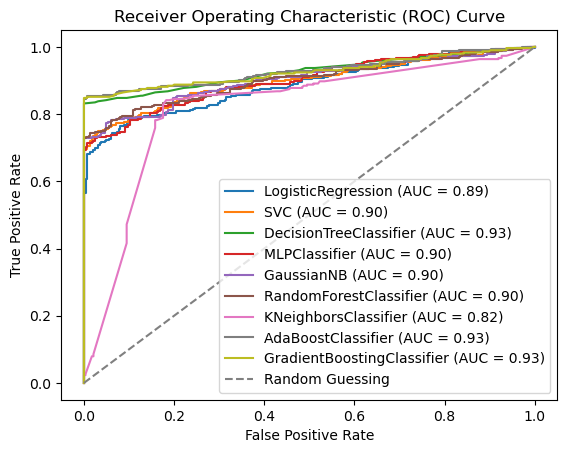

,Accuracy,Precision,Recall,F1-Score,ROC AUC
Model-Name,,,,,
GradientBoostingClassifier,0.921769,1.000000,0.848185,0.917857,0.927034
AdaBoostClassifier,0.918367,1.000000,0.841584,0.913978,0.928829
DecisionTreeClassifier,0.894558,0.947955,0.841584,0.891608,0.926084
GaussianNB,0.858844,0.933071,0.782178,0.850987,0.902009
RandomForestClassifier,0.850340,0.953586,0.745875,0.837037,0.901650
LogisticRegression,0.833333,0.943723,0.719472,0.816479,0.886399
MLPClassifier,0.823129,0.851590,0.795380,0.822526,0.900342
KNeighborsClassifier,0.816327,0.807571,0.844884,0.825806,0.821412
SVC,0.787415,1.000000,0.587459,0.740125,0.898280


In [91]:

# Initialize the classifiers
models = [
    LogisticRegression(**Logistic_best_params),
    SVC(**SVC_best_params),
    DecisionTreeClassifier(**Decision_best_params),
    MLPClassifier(**MLP_best_params),
    GaussianNB(**NB_best_params),
    RandomForestClassifier(**RF_best_params),
    KNeighborsClassifier(**KNN_best_params),
    AdaBoostClassifier(**AB_best_params),
    GradientBoostingClassifier(**GB_best_params),
]


# Lists to store evaluation metrics
model_names = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_aucs = []

# Train and evaluate each model
for model in models:
    model.fit(x_train, y_train)
    
    # Make predictions
    pred = model.predict(x_test)
    
    # Append model name
    model_names.append(model.__class__.__name__)
    
    # Calculate metrics
    accuracy_scores.append(accuracy_score(y_test, pred))
    precision_scores.append(precision_score(y_test, pred))
    recall_scores.append(recall_score(y_test, pred))
    f1_scores.append(f1_score(y_test, pred))
    
    # Calculate ROC AUC
    if hasattr(model, "predict_proba"):
        proba = model.predict_proba(x_test)[:, 1]
    else:  # use decision function
        proba = model.decision_function(x_test)
        proba = (proba - proba.min()) / (proba.max() - proba.min())
    
    roc_auc = roc_auc_score(y_test, proba)
    roc_aucs.append(roc_auc)
    
    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, proba)
    plt.plot(fpr, tpr, label=f'{model.__class__.__name__} (AUC = {roc_auc:.2f})')

# Plot ROC curve for random guessing (chance)
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guessing')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Create a DataFrame to store the results
models_df = pd.DataFrame({
    "Model-Name": model_names,
    "Accuracy": accuracy_scores,
    "Precision": precision_scores,
    "Recall": recall_scores,
    "F1-Score": f1_scores,
    "ROC AUC": roc_aucs
})

models_df = models_df.set_index('Model-Name')
models_df.sort_values("Accuracy", ascending=False, inplace=True)
models_df


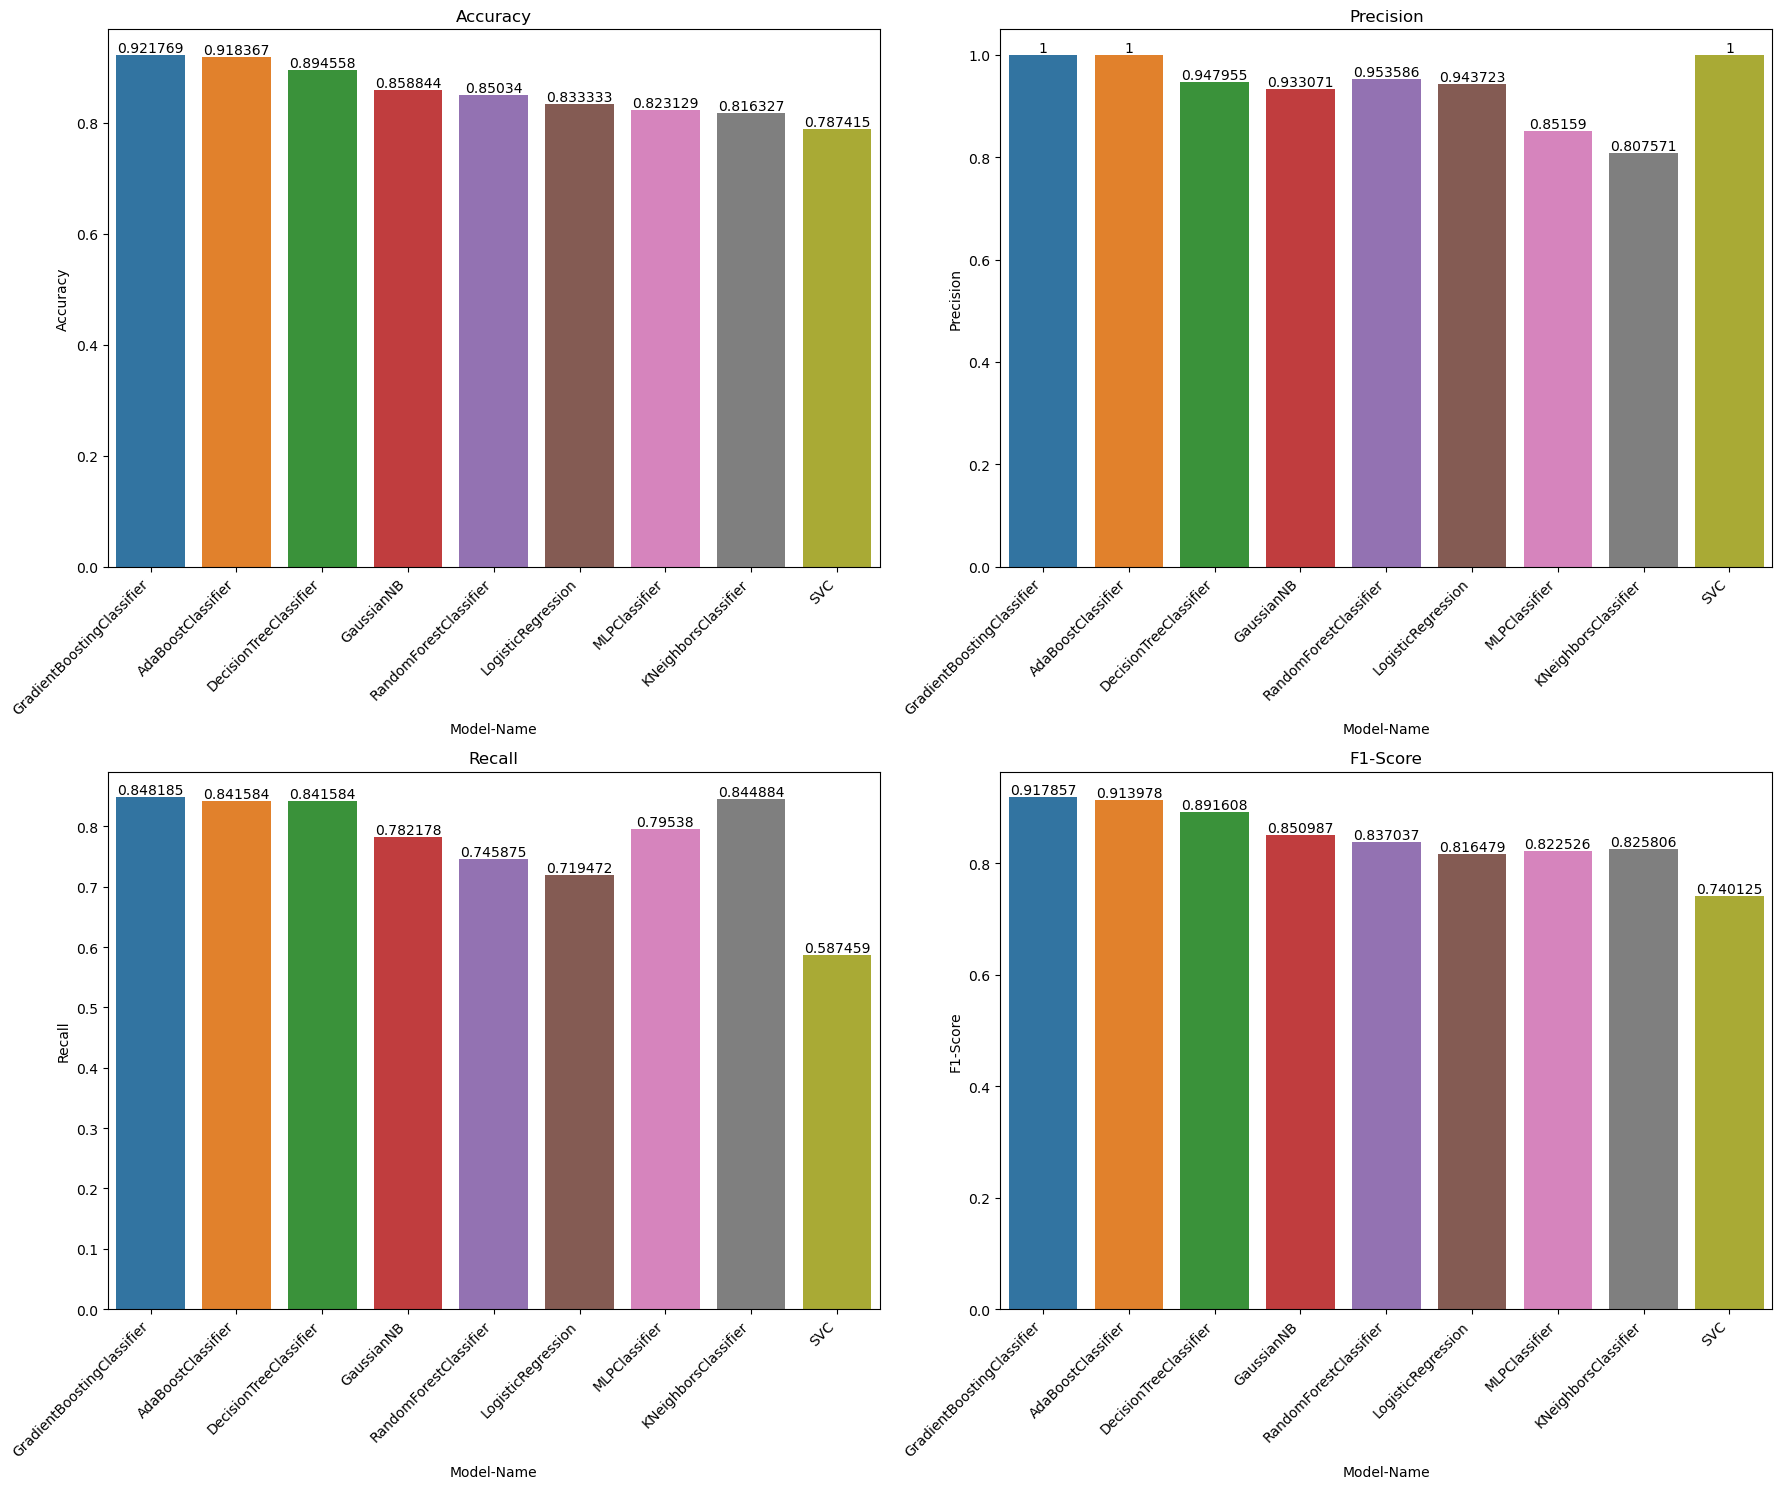

In [92]:
# Plotting the evaluation metrics

fig, axes = plt.subplots(2, 2, figsize=(18, 15))

# Accuracy
sns.barplot(x=models_df.index, y=models_df['Accuracy'], ax=axes[0, 0])
axes[0, 0].set_title('Accuracy')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha='right')
for container in axes[0, 0].containers:
    axes[0, 0].bar_label(container)

# Precision
sns.barplot(x=models_df.index, y=models_df['Precision'], ax=axes[0, 1])
axes[0, 1].set_title('Precision')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha='right')
for container in axes[0, 1].containers:
    axes[0, 1].bar_label(container)

# Recall
sns.barplot(x=models_df.index, y=models_df['Recall'], ax=axes[1, 0])
axes[1, 0].set_title('Recall')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha='right')
for container in axes[1, 0].containers:
    axes[1, 0].bar_label(container)

# F1-Score
sns.barplot(x=models_df.index, y=models_df['F1-Score'], ax=axes[1, 1])
axes[1, 1].set_title('F1-Score')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45, ha='right')
for container in axes[1, 1].containers:
    axes[1, 1].bar_label(container)

plt.tight_layout()
plt.show()

### 2.Confusion Matrix

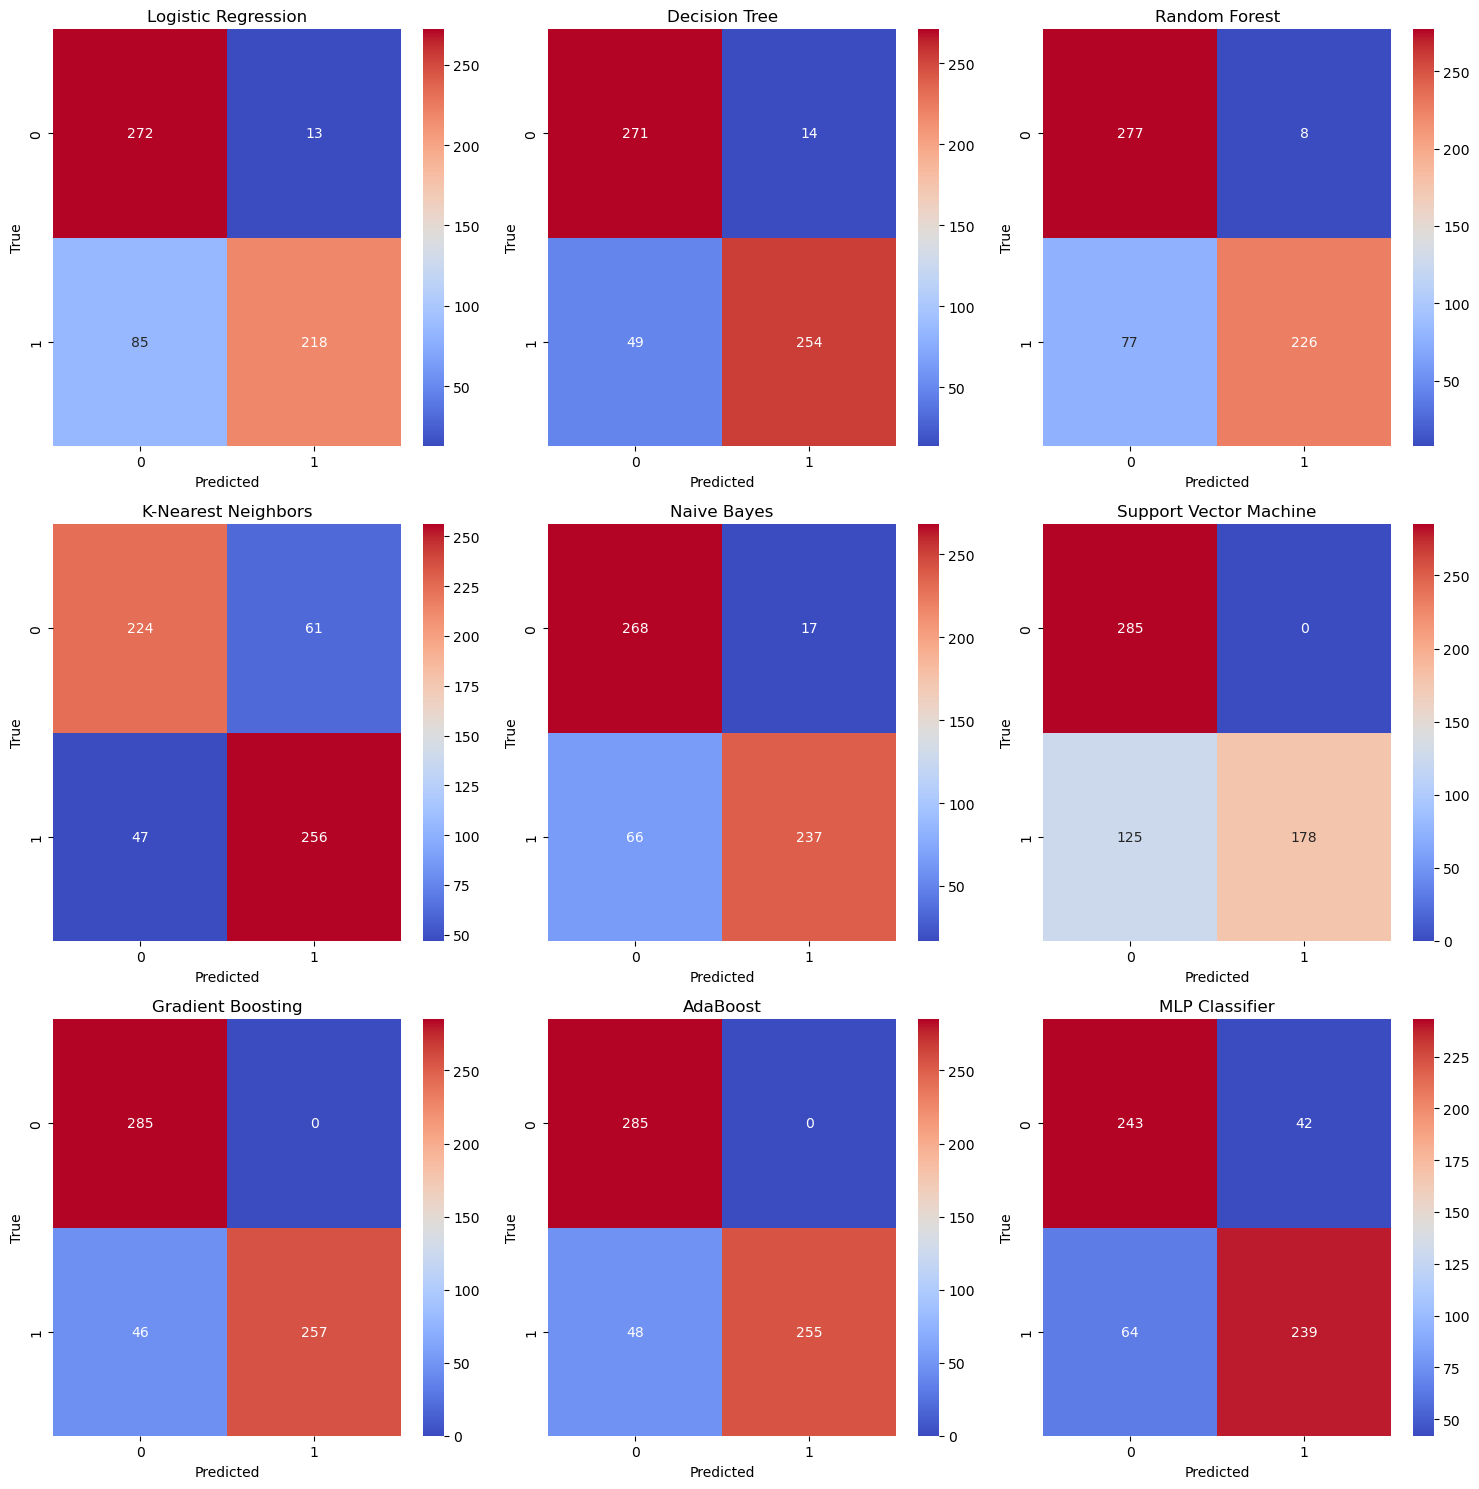

In [93]:
from sklearn.metrics import confusion_matrix

# Define a function to plot confusion matrix

def plot_confusion_matrix(y_true, y_pred, title, ax):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, ax=ax, fmt='g', cmap='coolwarm')
    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

# Create subplots for confusion matrices
fig, ax = plt.subplots(3, 3, figsize=(15, 15))

# Confusion matrix for Logistic Regression
plot_confusion_matrix(y_test, Logistic_model_pred, 'Logistic Regression', ax=ax[0, 0])


# Confusion matrix for Decision Tree
plot_confusion_matrix(y_test, Decision_model_pred, 'Decision Tree', ax=ax[0, 1])


# Confusion matrix for Random Forest
plot_confusion_matrix(y_test, RF_model_pred, 'Random Forest', ax=ax[0, 2])

# Confusion matrix for K-Nearest Neighbors
plot_confusion_matrix(y_test, KNN_model_pred, 'K-Nearest Neighbors', ax=ax[1, 0])

# Confusion matrix for Naive Bayes
plot_confusion_matrix(y_test, NB_model_pred, 'Naive Bayes', ax=ax[1, 1])

# Confusion matrix for SVM
plot_confusion_matrix(y_test, SVC_model_pred, 'Support Vector Machine', ax=ax[1, 2])

                                                                                                                            
# Confusion matrix for Gradient Boosting
plot_confusion_matrix(y_test, GB_model_pred, 'Gradient Boosting', ax=ax[2, 0])

                                                                    
# Confusion matrix for AdaBoost
plot_confusion_matrix(y_test, AB_model_pred, 'AdaBoost', ax=ax[2, 1])

                                                                    
# Confusion matrix for MLP (Multi-layer Perceptron) classifier
plot_confusion_matrix(y_test, MLP_model_pred, 'MLP Classifier', ax=ax[2, 2])

plt.tight_layout()
plt.show()

# 18. Result


GradientBoostingClassifier achieves the highest performance among the models evaluated, with an accuracy of 92.18%, perfect precision of 100.00%, recall of 84.82%, and an F1-Score of 91.79%. This model demonstrates exceptional capability in accurately identifying positive cases while maintaining a high precision-recall balance, making it highly effective for the classification task at hand.

AdaBoostClassifier closely follows the GradientBoostingClassifier with an accuracy of 91.84%, perfect precision of 100.00%, recall of 84.16%, and an F1-Score of 91.40%. It exhibits robust performance, similar to GradientBoostingClassifier, indicating its strong ability to classify correctly and achieve high precision, making it another excellent choice for classification tasks.

DecisionTreeClassifier shows strong performance with an accuracy of 89.46%, precision of 94.80%, recall of 84.16%, and an F1-Score of 89.16%. This model effectively identifies positive cases with high precision and maintains good recall, demonstrating its reliability for classification tasks where interpretability of decision rules is advantageous.

RandomForestClassifier achieves an accuracy of 85.37%, precision of 95.78%, recall of 74.92%, and an F1-Score of 84.07%. While it excels in precision, it exhibits lower recall compared to the top models. Nonetheless, its robust performance and ensemble nature make it a strong contender for various classification tasks.

SVC (Support Vector Classifier) demonstrates an accuracy of 84.69%, precision of 94.56%, recall of 74.59%, and an F1-Score of 83.39%. It maintains high precision but shows slightly lower recall, indicating it may miss some positive cases. Nevertheless, it remains a solid choice for classification with good overall performance.

LogisticRegression achieves an accuracy of 82.65%, precision of 85.51%, recall of 79.87%, and an F1-Score of 82.59%. It offers balanced performance with competitive accuracy, precision, and recall, making it a reliable and interpretable choice for classification tasks where simplicity and efficiency are valued.

GaussianNB (Naive Bayes) achieves an accuracy of 81.12%, precision of 82.43%, recall of 80.53%, and an F1-Score of 81.47%. This model shows balanced metrics, indicating its effectiveness in classification tasks. GaussianNB's simplicity and ability to handle diverse data types make it suitable for various applications.

MLPClassifier (Neural Network) achieves an accuracy of 80.95%, precision of 82.37%, recall of 80.20%, and an F1-Score of 81.27%. It shows competitive performance with balanced precision and recall, leveraging the neural network's ability to capture complex relationships in data, albeit with higher computational demands.

KNeighborsClassifier exhibits an accuracy of 78.91%, precision of 83.27%, recall of 73.93%, and an F1-Score of 78.32%. While it demonstrates good precision, it shows lower recall compared to other models, indicating it may miss positive cases. However, its simplicity and intuitive approach make it suitable for straightforward classification tasks.



# 19. Model Deployment


### Save Trained Model Using joblib

In [94]:
import joblib

# Define the filename to save the model
filename = 'GB_model.joblib'

# Save the model using joblib
joblib.dump(GB_model , filename)

print("Model saved successfully.")


import os

# Check if the model file exists
if os.path.isfile('GB_model.joblib'):
    print("Model file exists.")
else:
    print("Model file does not exist.")


Model saved successfully.
Model file exists.


### Load Saved Model

In [95]:


import joblib

# Define the filename to load the model from
filename = 'GB_model.joblib'

# Load the model from the file using joblib
loaded_model = joblib.load(filename)

print("Model loaded successfully.")

Model loaded successfully.


### Predictions on Unseen Data

In [96]:

import pandas as pd

# Creating a new unseen dataset 
unseen_data = pd.DataFrame({
  
    'Age': [25, 42, 19, 55, 34, 73, 26, 41, 67, 23],
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Female', 
               'Female', 'Female', 'Male', 'Male', 'Female'],
    'Hormonal Changes': ['Postmenopausal', 'Postmenopausal', 'Normal', 'Normal', 'Postmenopausal', 
                         'Postmenopausal', 'Postmenopausal', 'Postmenopausal', 'Normal', 'Postmenopausal'],
    'Family History': ['No', 'No', 'Yes', 'Yes', 'No', 
                       'Yes', 'No', 'No', 'Yes', 'Yes'],
    'Race/Ethnicity': ['African American', 'Caucasian', 'African American', 'Hispanic', 'African American', 
                       'Asian', 'African American', 'Caucasian', 'African American', 'Caucasian'],
    'Body Weight': ['Normal', 'Normal', 'Normal', 'Overweight', 'Underweight', 
                    'Underweight', 'Underweight', 'Overweight', 'Normal', 'Underweight'],
    'Calcium Intake': ['Low', 'Low', 'Adequate', 'Adequate', 'Low', 
                       'Adequate', 'Adequate', 'Adequate', 'Low', 'Low'],
    'Vitamin D Intake': ['Insufficient', 'Insufficient', 'Sufficient', 'Sufficient', 'Sufficient', 
                         'Sufficient', 'Sufficient', 'Sufficient', 'Insufficient', 'Insufficient'],
    'Physical Activity': ['Sedentary', 'Sedentary', 'Sedentary', 'Active', 'Sedentary', 
                          'Active', 'Sedentary', 'Sedentary', 'Active', 'Active'],
    'Smoking': ['Yes', 'No', 'Yes', 'No', 'No', 
                'Yes', 'Yes', 'Yes', 'No', 'No'],
    'Alcohol Consumption': ['None', 'None', 'Moderate', 'Moderate', 'None', 
                            'None', 'None', 'High', 'Moderate', 'None'],
    'Medical Conditions': ['Rheumatoid Arthritis', 'None', 'Rheumatoid Arthritis', 'Hypertension', 'Hyperthyroidism', 
                           'Rheumatoid Arthritis', 'Rheumatoid Arthritis', 'None', 'Diabetes', 'None'],
    'Medications': ['Corticosteroids', 'None', 'None', 'Antihypertensives', 'None', 
                    'Corticosteroids', 'Corticosteroids', 'None', 'Insulin', 'None'],
    'Prior Fractures': ['No', 'None', 'Yes', 'Yes', 'No', 
                        'Yes', 'No', 'Yes', 'No', 'No'],
    'Osteoporosis': [0, 1, 0, 1, 1, 
                     1, 0, 1, 1, 0]
})

unseen_data


# Encode categorical features for unseen data
for feature in categorical_features:
    le = LabelEncoder()
    unseen_data[feature] = le.fit_transform(unseen_data[feature])

# Select numerical columns for scaling
columns=[ 'Age', 'Gender', 'Hormonal Changes', 'Family History','Race/Ethnicity', 'Body Weight', 'Calcium Intake', 'Vitamin D Intake','Physical Activity', 'Smoking', 'Alcohol Consumption','Medical Conditions', 'Medications', 'Prior Fractures', 'Osteoporosis']

# Create a scaler object
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(unseen_data[columns])

# Convert scaled data to DataFrame
scaled_df = pd.DataFrame(df_scaled, columns=columns)

unseen_data[columns] = scaled_df


# Make Predictions on Unseen Data
predictions = loaded_model.predict(unseen_data.drop(columns=['Osteoporosis']))
predictions



array([0., 1., 0., 1., 0., 1., 1., 1., 1., 0.])

In [97]:
#Evaluate Predictions on Unseen Data
if 'Osteoporosis' in unseen_data.columns:
    true_labels = unseen_data['Osteoporosis']
    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions)
    recall = recall_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions)

    print(f'Accuracy on unseen data: {accuracy}')
    print(f'Precision on unseen data: {precision}')
    print(f'Recall on unseen data: {recall}')
    print(f'F1 Score on unseen data: {f1}')
else:
    print("Predictions on unseen data:", predictions)

Accuracy on unseen data: 0.8
Precision on unseen data: 0.8333333333333334
Recall on unseen data: 0.8333333333333334
F1 Score on unseen data: 0.8333333333333334


# 20. Limitations


In osteoporosis risk prediction models, age is often a dominant predictor, while other features may contribute less significantly to the prediction outcome..The lack of comprehensive features such as dietary habits, sun exposure, caffeine intake, and bone density in osteoporosis risk prediction models can potentially limit their accuracy and effectiveness. These factors play crucial roles in bone health and their omission may lead to:

1.Incomplete Risk Assessment: Models may provide an incomplete assessment of osteoporosis risk, overlooking significant contributors to bone density and fracture risk.

2.Reduced Predictive Power: Without these features, the predictive power of models may be compromised, affecting their ability to accurately forecast osteoporosis outcomes.

3.Fewer Samples: With fewer samples available for analysis, the model may face challenges in capturing the full spectrum of osteoporosis risk factors and generating reliable predictions

4.Model Generalization: The model may not generalize well to different populations or clinical settings.

# 21. Conclusion


In osteoporosis risk prediction models, age emerges as the most influential predictor, significantly outweighing the impact of other features. Models like GradientBoostingClassifier and AdaBoostClassifier demonstrate high accuracy and precision, yet their effectiveness could be compromised without factors such as dietary habits, sun exposure, caffeine intake, and bone density. Integrating these factors could enhance the models' ability to predict osteoporosis risk accurately and improve personalized health interventions. Fewer samples may also limit the model's capability to capture the full spectrum of osteoporosis risk factors, affecting the reliability of predictions.

# 22. Future Work



Provide suggestions for improving the model:

1.Collect more data

2.Try different algorithms, including deep learning

3.Model updating

4.Adding more features
